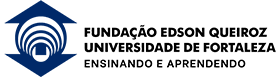


# LUCAS PAULINO BRITO DOS SANTOS

<H2>TENDÊNCIAS E FATORES ASSOCIADOS AO AUMENTO DE CASOS DE POLIOMIELITE NO BRASIL: UMA ANÁLISE MULTIDIMENSIONAL.</H2>

# Importando e instalando bibliotecas

In [1]:
!pip install dash
!pip install scikit-learn
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import sys
import glob
import re
import os
from dash import dash, html, dcc, Input, Output
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from warnings import filterwarnings
import seaborn as sns

# Visualização do dado

In [3]:
df_vacinas = pd.read_excel("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/Vacinação/Vacinas.xlsx")
df_poliomielite_notificacao = pd.read_csv("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/Notificações/Poliomielite/Poliomielite - Notificação.csv", delimiter=';')
df_poliomielite_mortes = pd.read_csv("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/Mortes/Poliomielite/Poliomielite - Mortalidade.csv", delimiter=';')
df_populacao = pd.read_csv("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/populacao.csv", delimiter=';')
dados_esgoto = pd.read_csv("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/Saneamento/Índice de Atendimento Total com Coleta de Esgoto no Brasil.csv", delimiter=';')
dados_agua = pd.read_csv("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/Saneamento/Índice de Atendimento Total de Água no Brasil.csv", delimiter=';')
df_socioeconomico = pd.read_csv("/content/drive/MyDrive/TCC Ciência de Dados/DataSets/socioeconomico.csv", delimiter=';')

In [4]:
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imunobiológicos  75 non-null     object
 1   2007             75 non-null     int64 
 2   2008             75 non-null     int64 
 3   2009             75 non-null     int64 
 4   2010             75 non-null     int64 
 5   2011             75 non-null     int64 
 6   2012             75 non-null     int64 
 7   2013             75 non-null     int64 
 8   2014             75 non-null     int64 
 9   2015             75 non-null     int64 
 10  2016             75 non-null     int64 
 11  2017             75 non-null     int64 
 12  2018             75 non-null     int64 
 13  2019             75 non-null     int64 
 14  2020             75 non-null     int64 
 15  2021             75 non-null     int64 
 16  2022             75 non-null     int64 
 17  2023             75 non-null     int6

In [5]:
df_poliomielite_notificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      28 non-null     object
 1   2005    28 non-null     object
 2   2007    28 non-null     object
 3   2008    28 non-null     int64 
 4   2009    28 non-null     int64 
 5   2010    28 non-null     object
 6   2011    28 non-null     int64 
 7   2012    28 non-null     object
 8   2013    28 non-null     object
 9   2014    28 non-null     object
 10  2015    28 non-null     object
 11  2016    28 non-null     int64 
 12  2017    28 non-null     int64 
 13  2018    28 non-null     object
 14  2019    28 non-null     object
 15  2020    28 non-null     object
 16  2021    28 non-null     object
 17  Total   28 non-null     int64 
dtypes: int64(6), object(12)
memory usage: 4.1+ KB


In [6]:
df_poliomielite_mortes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      26 non-null     object
 1   2007    26 non-null     object
 2   2008    26 non-null     object
 3   2009    26 non-null     object
 4   2010    26 non-null     object
 5   2011    26 non-null     object
 6   2012    26 non-null     object
 7   2013    26 non-null     object
 8   2014    26 non-null     object
 9   2015    26 non-null     object
 10  2016    26 non-null     object
 11  2017    26 non-null     object
 12  2018    26 non-null     object
 13  2019    26 non-null     object
 14  2020    26 non-null     object
 15  2021    26 non-null     object
 16  Total   26 non-null     int64 
dtypes: int64(1), object(16)
memory usage: 3.6+ KB


In [7]:
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  28 non-null     object
 1   2007                  28 non-null     int64 
 2   2008                  28 non-null     int64 
 3   2009                  28 non-null     int64 
 4   2010                  28 non-null     int64 
 5   2011                  28 non-null     int64 
 6   2012                  28 non-null     int64 
 7   2013                  28 non-null     int64 
 8   2014                  28 non-null     int64 
 9   2015                  28 non-null     int64 
 10  2016                  28 non-null     int64 
 11  2017                  28 non-null     int64 
 12  2018                  28 non-null     int64 
 13  2019                  28 non-null     int64 
 14  2020                  28 non-null     int64 
 15  2021                  28 non-null     int6

In [8]:
dados_esgoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Ano                                                   12 non-null     int64  
 1   Índice de Atendimento Total com Coleta de Esgoto (%)  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [9]:
dados_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Ano                                      12 non-null     int64  
 1   Índice de Atendimento Total de Água (%)  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [10]:
df_socioeconomico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Ano                                                                                                 22 non-null     int64  
 1   População residente x 1000                                                                          22 non-null     float64
 2   População economicamente ativa (PEA) x 1000                                                         22 non-null     float64
 3   Pessoas Ocupadas x 1000                                                                             22 non-null     float64
 4   Produto interno bruto (PIB) em milhões R$ correntes                                                 22 non-null     flo

# Tratando o dado

In [11]:
df_poliomielite_mortes = df_poliomielite_mortes.drop(columns=['2007','2020', '2021'])
df_poliomielite_notificacao = df_poliomielite_notificacao.drop(columns=['2005','2007','2020', '2021'])
df_vacinas = df_vacinas.drop(columns=['2007','2020', '2021', '2022', '2023'])
df_poliomielite_notificacao.replace("-", 0, inplace=True)
df_poliomielite_mortes.replace("-", 0, inplace=True)
df_populacao = df_populacao.drop(columns=['2007','2020', '2021'])

In [12]:
df_poliomielite_notificacao_plot = df_poliomielite_notificacao[df_poliomielite_notificacao['UF'] == 'Total']

In [13]:
df_poliomielite_mortes = df_poliomielite_mortes[df_poliomielite_mortes['UF'] == 'Total']

In [14]:
df_selecionado = df_vacinas

In [15]:
df_selecionado['Imunobiológicos'] = df_vacinas['Imunobiológicos'].str.contains('Poliomielite')

In [16]:
df_selecionado = df_selecionado[df_selecionado['Imunobiológicos']]

In [17]:
df_selecionado

,Imunobiológicos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
26,True,86973,101459,109132,107925,182636,223377,864375,2221360,7244948,8001819,7960116,7607323,57191207
28,True,13138735,13110373,12414299,12785901,10550241,2480024,1606161,3306833,4600145,4580208,4438537,4465027,114695238
29,True,15960841,15397979,14476765,0,0,12477972,0,0,0,0,0,0,74833976
30,True,15216400,15354747,14910623,0,0,0,0,0,0,0,0,0,61776848


In [18]:
df_selecionado.loc['Total'] = df_selecionado.sum(numeric_only=True, axis=0)
df_selecionado.loc['Total', 'Imunobiológicos'] = 'Total'

<ipython-input-18-cde861732cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado.loc['Total'] = df_selecionado.sum(numeric_only=True, axis=0)


In [19]:
df_selecionado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 26 to Total
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imunobiológicos  5 non-null      object
 1   2008             5 non-null      int64 
 2   2009             5 non-null      int64 
 3   2010             5 non-null      int64 
 4   2011             5 non-null      int64 
 5   2012             5 non-null      int64 
 6   2013             5 non-null      int64 
 7   2014             5 non-null      int64 
 8   2015             5 non-null      int64 
 9   2016             5 non-null      int64 
 10  2017             5 non-null      int64 
 11  2018             5 non-null      int64 
 12  2019             5 non-null      int64 
 13   Total           5 non-null      int64 
dtypes: int64(13), object(1)
memory usage: 772.0+ bytes


# Plotando o dado

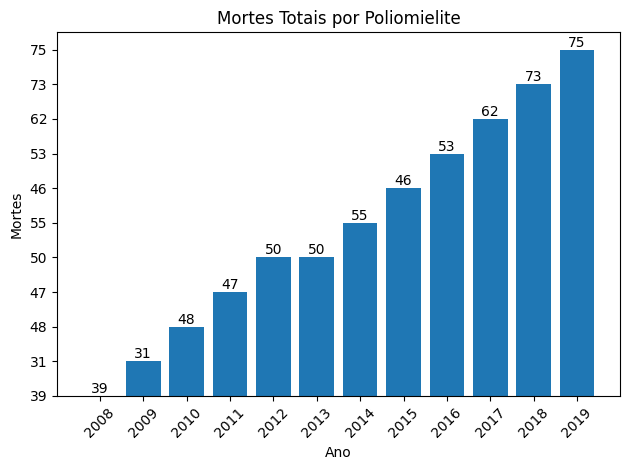

<ipython-input-20-89fb98d2ed77>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poliomielite_notificacao_plot[col] = pd.to_numeric(df_poliomielite_notificacao_plot[col], errors='coerce').fillna(0).astype(int)


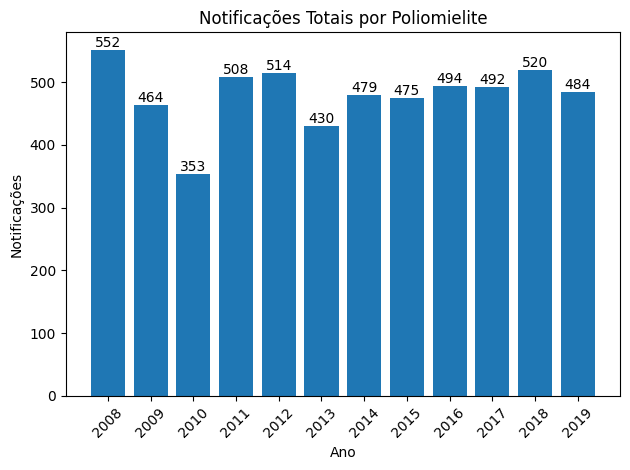

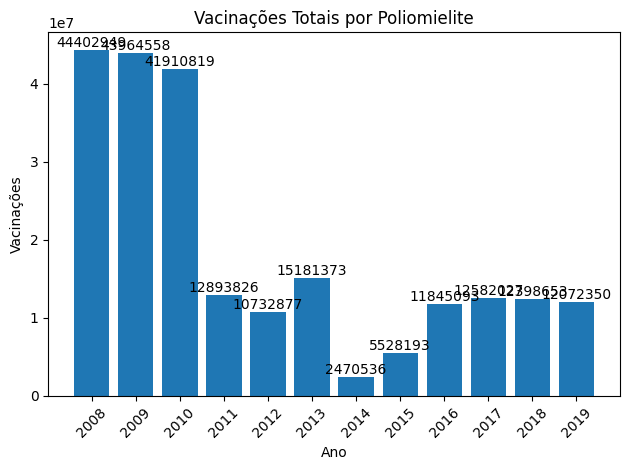

In [20]:
total_row = df_poliomielite_mortes[df_poliomielite_mortes['UF'] == 'Total']
total_values = total_row.iloc[0, 1:-1]

years = total_values.index
values = total_values.values

plt.bar(years, values)
plt.xlabel('Ano')
plt.ylabel('Mortes')
plt.title('Mortes Totais por Poliomielite')
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

df_poliomielite_notificacao_plot = df_poliomielite_notificacao[df_poliomielite_notificacao['UF'] == 'Total']

for col in df_poliomielite_notificacao_plot.columns[1:]:
    df_poliomielite_notificacao_plot[col] = pd.to_numeric(df_poliomielite_notificacao_plot[col], errors='coerce').fillna(0).astype(int)

# Plot de Notificações por Poliomielite
total_values = df_poliomielite_notificacao_plot.iloc[0, 1:-1]

years = total_values.index
values = total_values.values

plt.bar(years, values)
plt.xlabel('Ano')
plt.ylabel('Notificações')
plt.title('Notificações Totais por Poliomielite')
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


df_selecionado_plot = df_selecionado[df_selecionado['Imunobiológicos'] == 'Total']

total_values = df_selecionado_plot.iloc[0, 1:-1]

years = total_values.index
values = total_values.values

plt.bar(years, values)
plt.xlabel('Ano')
plt.ylabel('Vacinações')
plt.title('Vacinações Totais por Poliomielite')
plt.xticks(rotation=45)

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [21]:
for col in df_poliomielite_notificacao_plot.columns[1:]:
    df_poliomielite_notificacao_plot[col] = pd.to_numeric(df_poliomielite_notificacao_plot[col], errors='coerce').fillna(0).astype(int)

# Criar gráfico interativo com Plotly
fig = px.line()
fig.add_scatter(x=df_poliomielite_mortes.columns[1:-1], y=df_poliomielite_mortes[df_poliomielite_mortes['UF'] == 'Total'].values[0][1:-1], mode='lines+markers', name='Mortes')
fig.add_scatter(x=df_poliomielite_notificacao_plot.columns[1:-1], y=df_poliomielite_notificacao_plot.iloc[0, 1:-1], mode='lines+markers', name='Notificações')
fig.add_scatter(x=df_selecionado_plot.columns[1:-1], y=df_selecionado_plot.iloc[0, 1:-1], mode='lines+markers', name='Vacinações')

fig.update_layout(title='Comparação entre Mortes, Notificações e Vacinações por Poliomielite',
                  xaxis_title='Ano',
                  yaxis_title='Valores')

fig.show()

<ipython-input-21-3da028ea80a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poliomielite_notificacao_plot[col] = pd.to_numeric(df_poliomielite_notificacao_plot[col], errors='coerce').fillna(0).astype(int)


# Tratando para Previsões

In [22]:
df_populacao_prev = df_populacao[df_populacao['Unidade da Federação'] == 'Total']
df_casos_poliomielite_prev = df_poliomielite_notificacao.melt(id_vars=['UF'], var_name='Ano', value_name='Casos_Poliomielite')
df_poliomielite_mortes_prev = df_poliomielite_mortes.melt(id_vars=['UF'], var_name='Ano', value_name='Mortes_Poliomielite')
df_selecionado_plot_prev =  df_selecionado_plot.melt(id_vars=['Imunobiológicos'], var_name='Ano', value_name='Vacinas_Poliomielite')
df_populacao_prev = df_populacao_prev.melt(id_vars=['Unidade da Federação'], var_name='Ano', value_name='Populacao_Brasil')

In [23]:
df_poliomielite_mortes_prev = df_poliomielite_mortes_prev.drop('UF', axis=1)

In [24]:
linha_total = df_poliomielite_notificacao[df_poliomielite_notificacao['UF'] == 'Total']

In [25]:
linha_total_prev = linha_total.melt(id_vars=['UF'], var_name='Ano', value_name='Casos_Poliomielite')
linha_total_prev = linha_total_prev.drop('UF', axis=1)
df_populacao_prev = df_populacao_prev.drop('Unidade da Federação', axis=1)

In [26]:
df_populacao_prev

,Ano,Populacao_Brasil
0,2008,191010274
1,2009,192980905
2,2010,194890682
3,2011,196603732
4,2012,198314934
5,2013,200004188
6,2014,201717541
7,2015,203475683
8,2016,205156587
9,2017,206804741


In [27]:
df_selecionado_plot_prev = df_selecionado_plot_prev[df_selecionado_plot_prev['Ano'] != ' Total']

In [28]:
df_poliomielite_mortes_prev = df_poliomielite_mortes_prev[df_poliomielite_mortes_prev['Ano'] != 'Total']

In [29]:
df_combined2 = pd.merge(linha_total_prev, df_poliomielite_mortes_prev, on='Ano')

In [30]:
df_combined2 = pd.merge(df_combined2, df_selecionado_plot_prev, on='Ano')

In [31]:
df_combined2

,Ano,Casos_Poliomielite,Mortes_Poliomielite,Imunobiológicos,Vacinas_Poliomielite
0,2008,552,39,Total,44402949
1,2009,464,31,Total,43964558
2,2010,353,48,Total,41910819
3,2011,508,47,Total,12893826
4,2012,514,50,Total,10732877
5,2013,430,50,Total,15181373
6,2014,479,55,Total,2470536
7,2015,475,46,Total,5528193
8,2016,494,53,Total,11845093
9,2017,492,62,Total,12582027


In [32]:
df_combined2['Ano'] = pd.to_datetime(df_combined2['Ano'], format='%Y')
dados_esgoto['Ano'] = pd.to_datetime(dados_esgoto['Ano'], format='%Y')
dados_agua['Ano'] = pd.to_datetime(dados_agua['Ano'], format='%Y')
df_socioeconomico['Ano'] = pd.to_datetime(df_socioeconomico['Ano'], format='%Y')

In [33]:
df_combined2 = df_combined2.set_index('Ano')
df_combined2 = df_combined2.drop('Imunobiológicos', axis=1)
dados_esgoto = dados_esgoto.set_index('Ano')
dados_agua = dados_agua.set_index('Ano')
df_socioeconomico = df_socioeconomico.set_index('Ano')

In [34]:
df_combined2['Mortes_Poliomielite'] = df_combined2['Mortes_Poliomielite'].astype(int)

In [35]:
df_combined2

,Casos_Poliomielite,Mortes_Poliomielite,Vacinas_Poliomielite
Ano,,,
2008-01-01,552,39,44402949
2009-01-01,464,31,43964558
2010-01-01,353,48,41910819
2011-01-01,508,47,12893826
2012-01-01,514,50,10732877
2013-01-01,430,50,15181373
2014-01-01,479,55,2470536
2015-01-01,475,46,5528193
2016-01-01,494,53,11845093


# Vizualizando depois de Tratado

In [36]:
import plotly.graph_objs as go
import plotly.offline as pyo

fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_esgoto.index,
                         y=dados_esgoto['Índice de Atendimento Total com Coleta de Esgoto (%)'],
                         mode='lines+markers',
                         name='Saneamento Básico (Esgoto)',
                         line=dict(color='green')))

fig.add_trace(go.Scatter(x=dados_agua.index,
                         y=dados_agua['Índice de Atendimento Total de Água (%)'],
                         mode='lines+markers',
                         name='Saneamento Básico (Água)',
                         line=dict(color='cyan')))

fig.update_layout(yaxis2=dict(title='Saneamento Básico'))

fig.update_layout(legend=dict(x=0, y=1))

pyo.iplot(fig)


In [37]:
fig = px.line(df_socioeconomico)

fig.show()

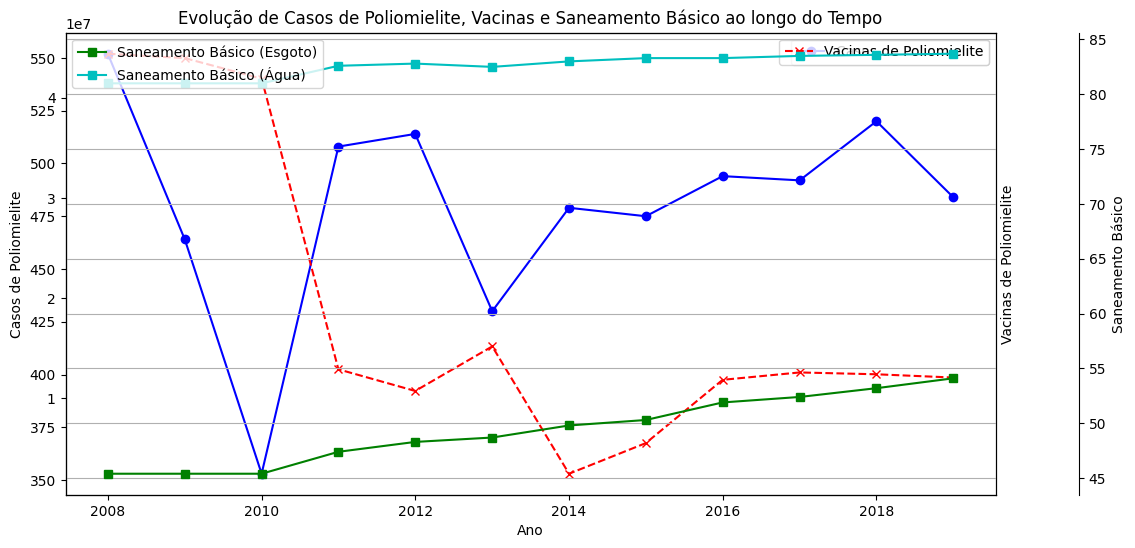

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined2.index, df_combined2['Casos_Poliomielite'], marker='o', linestyle='-', color='b', label='Casos de Poliomielite')
plt.title('Evolução de Casos de Poliomielite, Vacinas e Saneamento Básico ao longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Casos de Poliomielite')
plt.legend()

ax2 = plt.gca().twinx()
ax2.plot(df_combined2.index, df_combined2['Vacinas_Poliomielite'], marker='x', linestyle='--', color='r', label='Vacinas de Poliomielite')
ax2.set_ylabel('Vacinas de Poliomielite')
ax2.legend(loc='upper right')

ax3 = plt.gca().twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(dados_esgoto.index, dados_esgoto['Índice de Atendimento Total com Coleta de Esgoto (%)'], marker='s', linestyle='-', color='g', label='Saneamento Básico (Esgoto)')
ax3.plot(dados_agua.index, dados_agua['Índice de Atendimento Total de Água (%)'], marker='s', linestyle='-', color='c', label='Saneamento Básico (Água)')
ax3.set_ylabel('Saneamento Básico')
ax3.legend(loc='upper left')

plt.grid(True)
plt.show()


In [39]:
df_combined2['Casos_Poliomielite'] = pd.to_numeric(df_combined2['Casos_Poliomielite'], errors='coerce')

df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2008-01-01 to 2019-01-01
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Casos_Poliomielite    12 non-null     int64
 1   Mortes_Poliomielite   12 non-null     int64
 2   Vacinas_Poliomielite  12 non-null     int64
dtypes: int64(3)
memory usage: 384.0 bytes


In [40]:
df_combined2 = df_combined2.join(dados_esgoto, how='inner')
df_combined2 = df_combined2.join(dados_agua, how='inner')
df_combined2 = df_combined2.join(df_socioeconomico, how='inner')

In [41]:
df_combined2

,Casos_Poliomielite,Mortes_Poliomielite,Vacinas_Poliomielite,Índice de Atendimento Total com Coleta de Esgoto (%),Índice de Atendimento Total de Água (%),População residente x 1000,População economicamente ativa (PEA) x 1000,Pessoas Ocupadas x 1000,Produto interno bruto (PIB) em milhões R$ correntes,Produto interno bruto (PIB) em milhões R$ de 2021,Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC),Fator de conversão para paridade do poder de compra (PPC)
Ano,,,,,,,,,,,,
2008-01-01,552,39,44402949,45.4,81.0,191532.0,100586.0,92402.0,3109803.1,7617493.9,2558895.4,1.215291
2009-01-01,464,31,43964558,45.4,81.0,193544.0,102281.0,92686.0,3333039.4,7607910.2,2572056.7,1.295865
2010-01-01,353,48,41910819,45.4,81.0,194891.0,93500.0,92686.0,3885847.0,8180650.8,2798924.7,1.388336
2011-01-01,508,47,12893826,47.4,82.6,196604.0,101586.0,93493.0,4376382.0,8505784.5,2970630.8,1.473216
2012-01-01,514,50,10732877,48.3,82.8,198315.0,102463.0,94713.0,4814760.0,8669195.6,2998534.4,1.605704
2013-01-01,430,50,15181373,48.7,82.5,200004.0,103401.0,94713.0,5331619.0,8929689.5,3133893.6,1.701276
2014-01-01,479,55,2470536,49.8,83.0,201718.0,106824.0,94713.0,5778953.0,8974691.2,3187155.1,1.813201
2015-01-01,475,46,5528193,50.3,83.3,203476.0,105519.0,94713.0,5995787.0,8656469.9,3014754.8,1.988814
2016-01-01,494,53,11845093,51.9,83.3,205157.0,105519.0,94713.0,6269328.0,8372891.1,2939094.2,2.133082


In [42]:
y = df_combined2[['Casos_Poliomielite', 'Mortes_Poliomielite']]
X = df_combined2.drop('Casos_Poliomielite', axis=1)

# Vizualizando as correlações

In [43]:
df_combined2.describe()

,Casos_Poliomielite,Mortes_Poliomielite,Vacinas_Poliomielite,Índice de Atendimento Total com Coleta de Esgoto (%),Índice de Atendimento Total de Água (%),População residente x 1000,População economicamente ativa (PEA) x 1000,Pessoas Ocupadas x 1000,Produto interno bruto (PIB) em milhões R$ correntes,Produto interno bruto (PIB) em milhões R$ de 2021,Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC),Fator de conversão para paridade do poder de compra (PPC)
count,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,12.000000
mean,480.416667,52.416667,1.883194e+07,49.358333,82.608333,200890.666667,103186.333333,94080.916667,5.322856e+06,8.447816e+06,2.964993e+06,1.775201
std,50.442512,12.695442,1.523150e+07,3.110527,1.039631,6085.787173,3630.377675,965.412155,1.424561e+06,4.471611e+05,2.217835e+05,0.383365
min,353.000000,31.000000,2.470536e+06,45.400000,81.000000,191532.000000,93500.000000,92402.000000,3.109803e+06,7.607910e+06,2.558895e+06,1.215291
25%,472.250000,46.750000,1.156704e+07,46.900000,82.125000,196175.750000,102107.250000,93291.250000,4.253748e+06,8.324831e+06,2.904052e+06,1.451996
50%,488.000000,50.000000,1.249034e+07,49.250000,82.900000,200861.000000,104460.000000,94713.000000,5.555286e+06,8.570379e+06,3.006645e+06,1.757239
75%,509.500000,56.750000,2.186373e+07,52.025000,83.350000,205569.000000,105519.000000,94713.000000,6.348366e+06,8.686994e+06,3.136908e+06,2.145200
max,552.000000,75.000000,4.440295e+07,54.100000,83.700000,210147.000000,106824.000000,94713.000000,7.389131e+06,8.974691e+06,3.241317e+06,2.279669


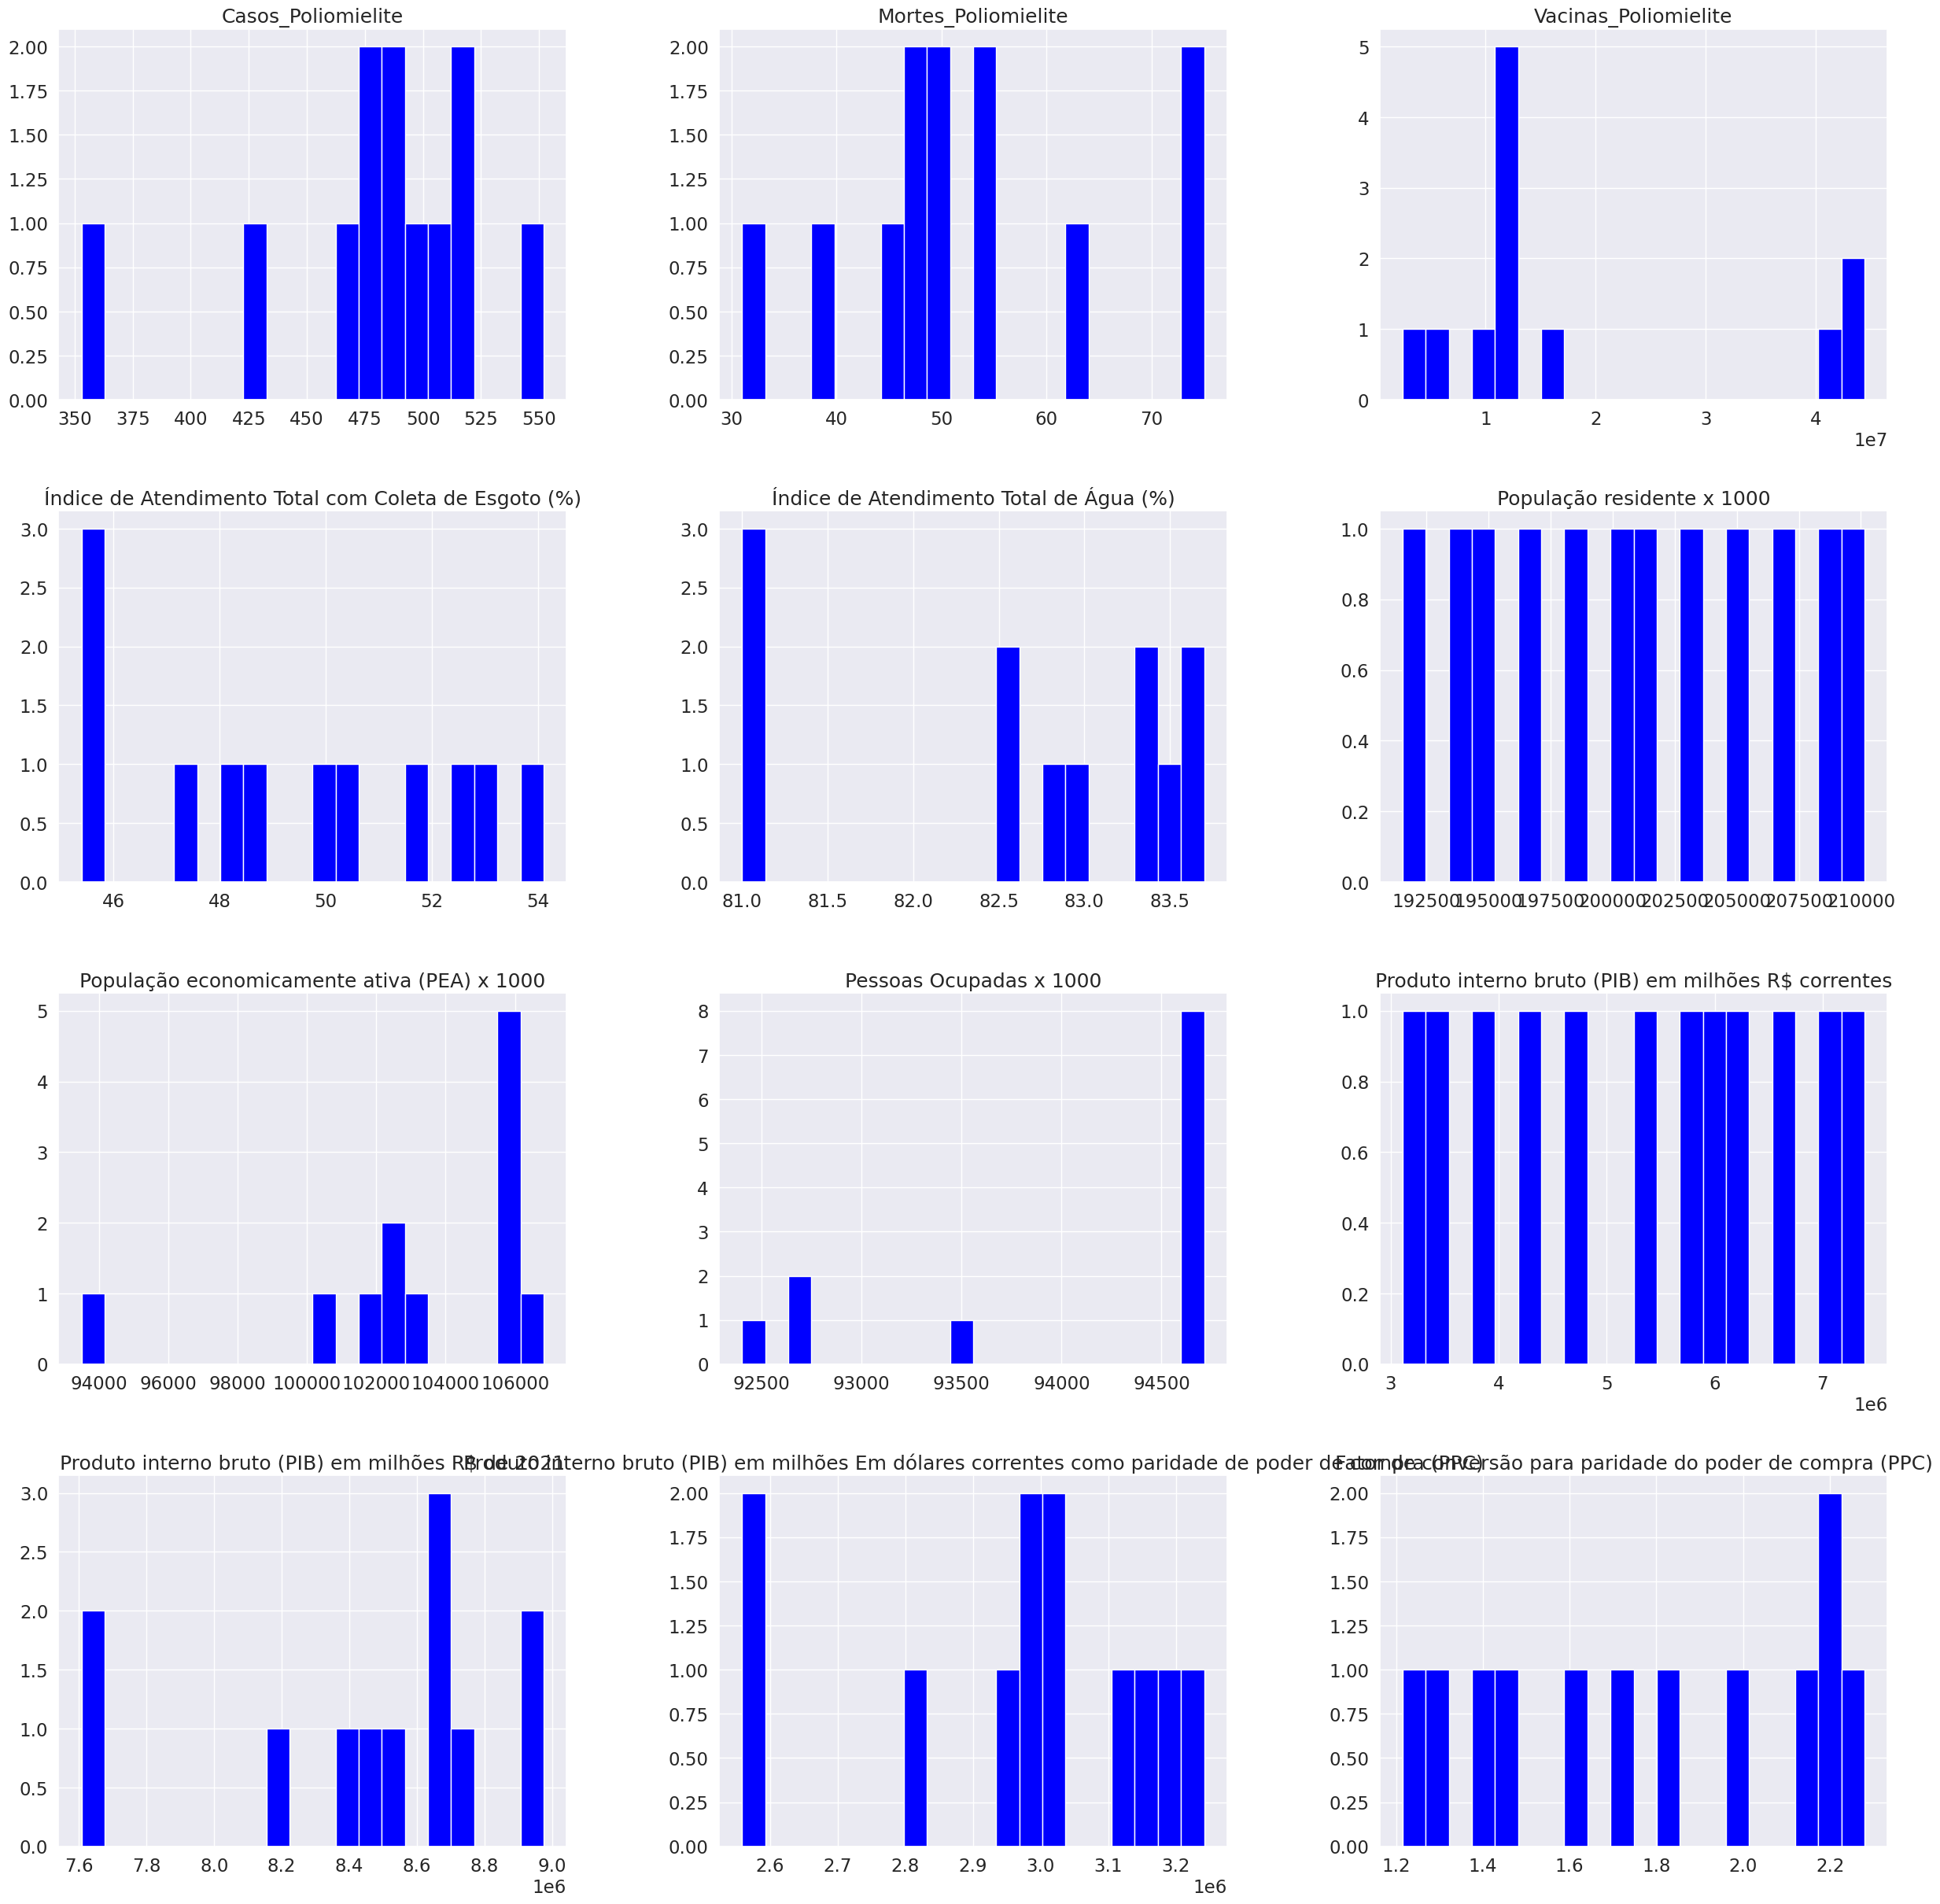

In [44]:
sns.set( font_scale=1.5, rc={'figure.figsize':(30,30)} )
eixo = df_combined2.hist( bins=20, color='blue' )

In [45]:
print(df_combined2.head())  # Exibe as primeiras linhas dos dados
print(df_combined2.describe())  # Resumo estatístico
print(df_combined2.info())  # Informações sobre os tipos de dados e valores ausentes


            Casos_Poliomielite  Mortes_Poliomielite  Vacinas_Poliomielite  \
Ano                                                                         
2008-01-01                 552                   39              44402949   
2009-01-01                 464                   31              43964558   
2010-01-01                 353                   48              41910819   
2011-01-01                 508                   47              12893826   
2012-01-01                 514                   50              10732877   

            Índice de Atendimento Total com Coleta de Esgoto (%)  \
Ano                                                                
2008-01-01                                               45.4      
2009-01-01                                               45.4      
2010-01-01                                               45.4      
2011-01-01                                               47.4      
2012-01-01                                          

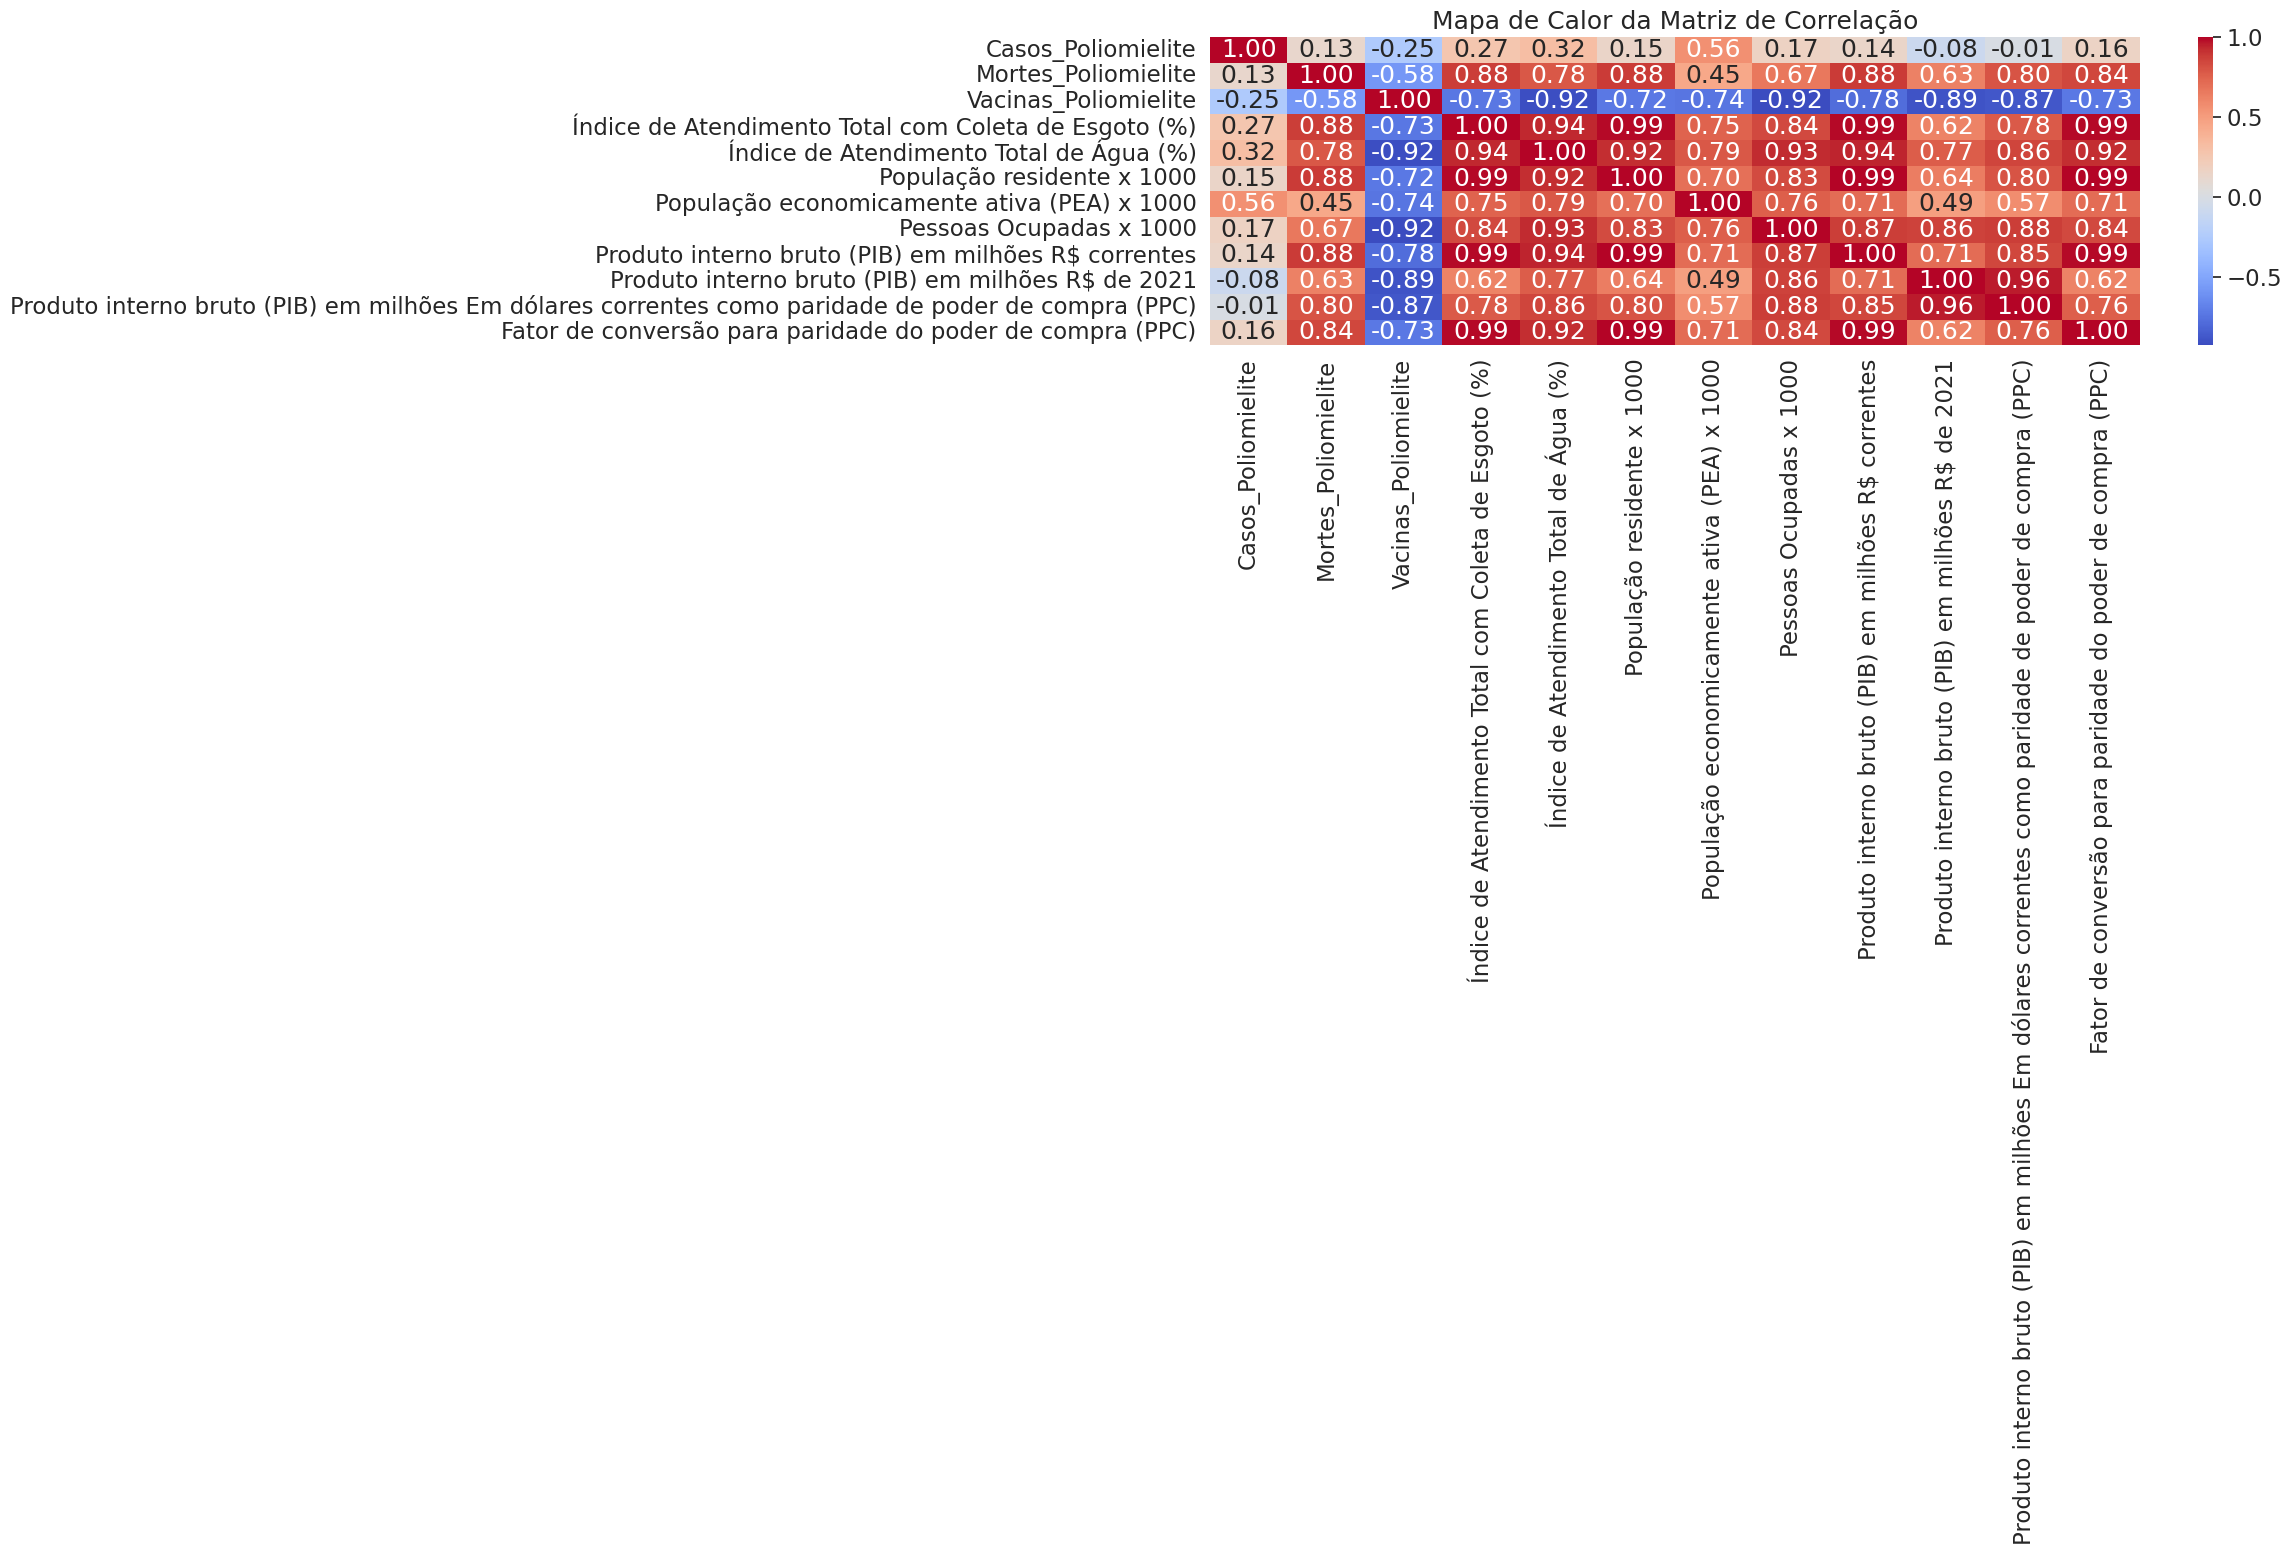

Coeficiente de Determinação (R²): 0.9766284932779603
Erro Quadrático Médio (MSE): 24.920244508296364


In [46]:
correlation_matrix = df_combined2.corr()
plt.figure(figsize=(15, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()
X = df_combined2[['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
                  'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
                  'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
                  'Produto interno bruto (PIB) em milhões R$ correntes',
                  'Produto interno bruto (PIB) em milhões R$ de 2021',
                  'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
                  'Fator de conversão para paridade do poder de compra (PPC)']]

y = df_combined2[['Casos_Poliomielite', 'Mortes_Poliomielite']]
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Coeficiente de Determinação (R²): {r2}")
print(f"Erro Quadrático Médio (MSE): {mse}")


# Treinamento e Previsões



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Coeficiente de Determinação (R²) nos dados de teste: {r2_test}")
print(f"Erro Quadrático Médio (MSE) nos dados de teste: {mse_test}")

Coeficiente de Determinação (R²) nos dados de teste: -3.9094124387192877
Erro Quadrático Médio (MSE) nos dados de teste: 2903.533208166688


In [48]:
X = df_combined2[['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
                  'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
                  'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
                  'Produto interno bruto (PIB) em milhões R$ correntes',
                  'Produto interno bruto (PIB) em milhões R$ de 2021',
                  'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
                  'Fator de conversão para paridade do poder de compra (PPC)']]

y = df_combined2[['Casos_Poliomielite']]

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     Casos_Poliomielite   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     4.988
Date:                Mon, 25 Sep 2023   Prob (F-statistic):              0.336
Time:                        22:53:30   Log-Likelihood:                -39.978
No. Observations:                  12   AIC:                             102.0
Df Residuals:                       1   BIC:                             107.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



In [49]:
import numpy as np

variables = ['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
             'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
             'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
             'Produto interno bruto (PIB) em milhões R$ correntes',
             'Produto interno bruto (PIB) em milhões R$ de 2021',
             'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
             'Fator de conversão para paridade do poder de compra (PPC)', 'Mortes_Poliomielite']

weighted_correlations = []
for variable in variables:
    weighted_corr = np.corrcoef(df_combined2[variable], df_combined2['Casos_Poliomielite'])[0, 1]
    weighted_correlations.append((variable, weighted_corr))

weighted_correlations.sort(key=lambda x: abs(x[1]), reverse=True)

for variable, correlation in weighted_correlations:
    print(f"Correlação ponderada entre {variable} e Casos_Poliomielite: {correlation:.4f}")


Correlação ponderada entre População economicamente ativa (PEA) x 1000 e Casos_Poliomielite: 0.5586
Correlação ponderada entre Índice de Atendimento Total de Água (%) e Casos_Poliomielite: 0.3232
Correlação ponderada entre Índice de Atendimento Total com Coleta de Esgoto (%) e Casos_Poliomielite: 0.2681
Correlação ponderada entre Vacinas_Poliomielite e Casos_Poliomielite: -0.2515
Correlação ponderada entre Pessoas Ocupadas x 1000 e Casos_Poliomielite: 0.1726
Correlação ponderada entre Fator de conversão para paridade do poder de compra (PPC) e Casos_Poliomielite: 0.1637
Correlação ponderada entre População residente x 1000 e Casos_Poliomielite: 0.1482
Correlação ponderada entre Produto interno bruto (PIB) em milhões R$ correntes e Casos_Poliomielite: 0.1403
Correlação ponderada entre Mortes_Poliomielite e Casos_Poliomielite: 0.1265
Correlação ponderada entre Produto interno bruto (PIB) em milhões R$ de 2021 e Casos_Poliomielite: -0.0842
Correlação ponderada entre Produto interno bruto 

Coeficiente de Determinação (R²) nos dados de teste: -8.586563025982908
Erro Quadrático Médio (MSE) nos dados de teste: 5760.459204946174


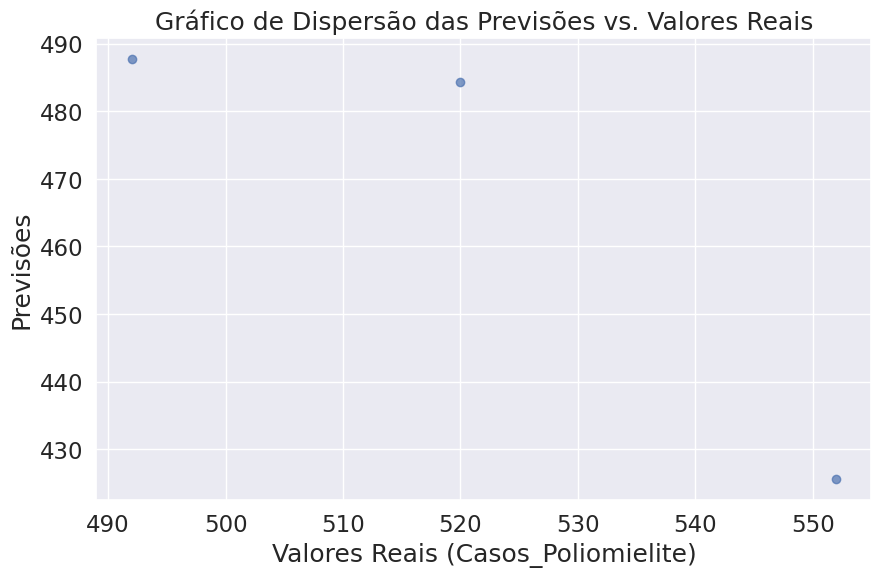

In [50]:
X = df_combined2[['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
                  'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
                  'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
                  'Produto interno bruto (PIB) em milhões R$ correntes',
                  'Produto interno bruto (PIB) em milhões R$ de 2021',
                  'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
                  'Fator de conversão para paridade do poder de compra (PPC)']]
y = df_combined2['Casos_Poliomielite']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) nos dados de teste: {r2}")
print(f"Erro Quadrático Médio (MSE) nos dados de teste: {mse}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Gráfico de Dispersão das Previsões vs. Valores Reais')
plt.xlabel('Valores Reais (Casos_Poliomielite)')
plt.ylabel('Previsões')
plt.grid(True)
plt.show()

In [51]:
novo_dados_df = df_combined2[['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
                  'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
                  'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
                  'Produto interno bruto (PIB) em milhões R$ correntes',
                  'Produto interno bruto (PIB) em milhões R$ de 2021',
                  'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
                  'Fator de conversão para paridade do poder de compra (PPC)']]

previsao = model.predict(novo_dados_df)

print("Previsão de Casos_Poliomielite:", previsao[0])

Previsão de Casos_Poliomielite: 425.5465166619033


In [52]:
ultimo_ano = pd.to_datetime('2019-01-01')

datas_futuras = []
for i in range(1, 4):
    ano_futuro = ultimo_ano.year + i
    data_futura = pd.to_datetime(f'{ano_futuro}-01-01')
    datas_futuras.append(data_futura)

datas_futuras_df = pd.DataFrame({'Ano': datas_futuras})

In [53]:
datas_futuras_df

,Ano
0,2020-01-01
1,2021-01-01
2,2022-01-01


In [54]:
previsao_df = datas_futuras_df.copy()
colunas_usadas = ['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
                  'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
                  'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
                  'Produto interno bruto (PIB) em milhões R$ correntes',
                  'Produto interno bruto (PIB) em milhões R$ de 2021',
                  'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
                  'Fator de conversão para paridade do poder de compra (PPC)']
colunas_originais = df_combined2.columns
for coluna in colunas_originais:
    if coluna not in previsao_df.columns:
        previsao_df[coluna] = 0

previsao_df = previsao_df.drop(['Ano', 'Casos_Poliomielite','Mortes_Poliomielite'], axis=1)

previsoes_futuras = model.predict(previsao_df)

print("Previsões para os próximos 3 anos:")
print(previsoes_futuras)


Previsões para os próximos 3 anos:
[-8520.12093785 -8520.12093785 -8520.12093785]


# Canonicas

In [55]:
from sklearn.cross_decomposition import CCA

In [56]:
df_combined2

,Casos_Poliomielite,Mortes_Poliomielite,Vacinas_Poliomielite,Índice de Atendimento Total com Coleta de Esgoto (%),Índice de Atendimento Total de Água (%),População residente x 1000,População economicamente ativa (PEA) x 1000,Pessoas Ocupadas x 1000,Produto interno bruto (PIB) em milhões R$ correntes,Produto interno bruto (PIB) em milhões R$ de 2021,Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC),Fator de conversão para paridade do poder de compra (PPC)
Ano,,,,,,,,,,,,
2008-01-01,552,39,44402949,45.4,81.0,191532.0,100586.0,92402.0,3109803.1,7617493.9,2558895.4,1.215291
2009-01-01,464,31,43964558,45.4,81.0,193544.0,102281.0,92686.0,3333039.4,7607910.2,2572056.7,1.295865
2010-01-01,353,48,41910819,45.4,81.0,194891.0,93500.0,92686.0,3885847.0,8180650.8,2798924.7,1.388336
2011-01-01,508,47,12893826,47.4,82.6,196604.0,101586.0,93493.0,4376382.0,8505784.5,2970630.8,1.473216
2012-01-01,514,50,10732877,48.3,82.8,198315.0,102463.0,94713.0,4814760.0,8669195.6,2998534.4,1.605704
2013-01-01,430,50,15181373,48.7,82.5,200004.0,103401.0,94713.0,5331619.0,8929689.5,3133893.6,1.701276
2014-01-01,479,55,2470536,49.8,83.0,201718.0,106824.0,94713.0,5778953.0,8974691.2,3187155.1,1.813201
2015-01-01,475,46,5528193,50.3,83.3,203476.0,105519.0,94713.0,5995787.0,8656469.9,3014754.8,1.988814
2016-01-01,494,53,11845093,51.9,83.3,205157.0,105519.0,94713.0,6269328.0,8372891.1,2939094.2,2.133082


In [57]:
print(df_combined2.columns)

Index(['Casos_Poliomielite', 'Mortes_Poliomielite', 'Vacinas_Poliomielite',
       'Índice de Atendimento Total com Coleta de Esgoto (%)',
       'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
       'População economicamente ativa (PEA) x 1000',
       'Pessoas Ocupadas x 1000',
       'Produto interno bruto (PIB) em milhões R$ correntes',
       'Produto interno bruto (PIB) em milhões R$ de 2021',
       'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
       'Fator de conversão para paridade do poder de compra (PPC)'],
      dtype='object')


In [58]:
print(df_combined2.isnull().sum())

Casos_Poliomielite                                                                                    0
Mortes_Poliomielite                                                                                   0
Vacinas_Poliomielite                                                                                  0
Índice de Atendimento Total com Coleta de Esgoto (%)                                                  0
Índice de Atendimento Total de Água (%)                                                               0
População residente x 1000                                                                            0
População economicamente ativa (PEA) x 1000                                                           0
Pessoas Ocupadas x 1000                                                                               0
Produto interno bruto (PIB) em milhões R$ correntes                                                   0
Produto interno bruto (PIB) em milhões R$ de 2021               

In [59]:
df_combined2.dtypes

Casos_Poliomielite                                                                                      int64
Mortes_Poliomielite                                                                                     int64
Vacinas_Poliomielite                                                                                    int64
Índice de Atendimento Total com Coleta de Esgoto (%)                                                  float64
Índice de Atendimento Total de Água (%)                                                               float64
População residente x 1000                                                                            float64
População economicamente ativa (PEA) x 1000                                                           float64
Pessoas Ocupadas x 1000                                                                               float64
Produto interno bruto (PIB) em milhões R$ correntes                                                   float64
Produto in

In [60]:
X = df_combined2.iloc[:, 0:2]
Y = df_combined2.iloc[:,2:11]

In [61]:
X.head()

,Casos_Poliomielite,Mortes_Poliomielite
Ano,,
2008-01-01,552,39
2009-01-01,464,31
2010-01-01,353,48
2011-01-01,508,47
2012-01-01,514,50


In [62]:
Y.head()

,Vacinas_Poliomielite,Índice de Atendimento Total com Coleta de Esgoto (%),Índice de Atendimento Total de Água (%),População residente x 1000,População economicamente ativa (PEA) x 1000,Pessoas Ocupadas x 1000,Produto interno bruto (PIB) em milhões R$ correntes,Produto interno bruto (PIB) em milhões R$ de 2021,Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)
Ano,,,,,,,,,
2008-01-01,44402949,45.4,81.0,191532.0,100586.0,92402.0,3109803.1,7617493.9,2558895.4
2009-01-01,43964558,45.4,81.0,193544.0,102281.0,92686.0,3333039.4,7607910.2,2572056.7
2010-01-01,41910819,45.4,81.0,194891.0,93500.0,92686.0,3885847.0,8180650.8,2798924.7
2011-01-01,12893826,47.4,82.6,196604.0,101586.0,93493.0,4376382.0,8505784.5,2970630.8
2012-01-01,10732877,48.3,82.8,198315.0,102463.0,94713.0,4814760.0,8669195.6,2998534.4


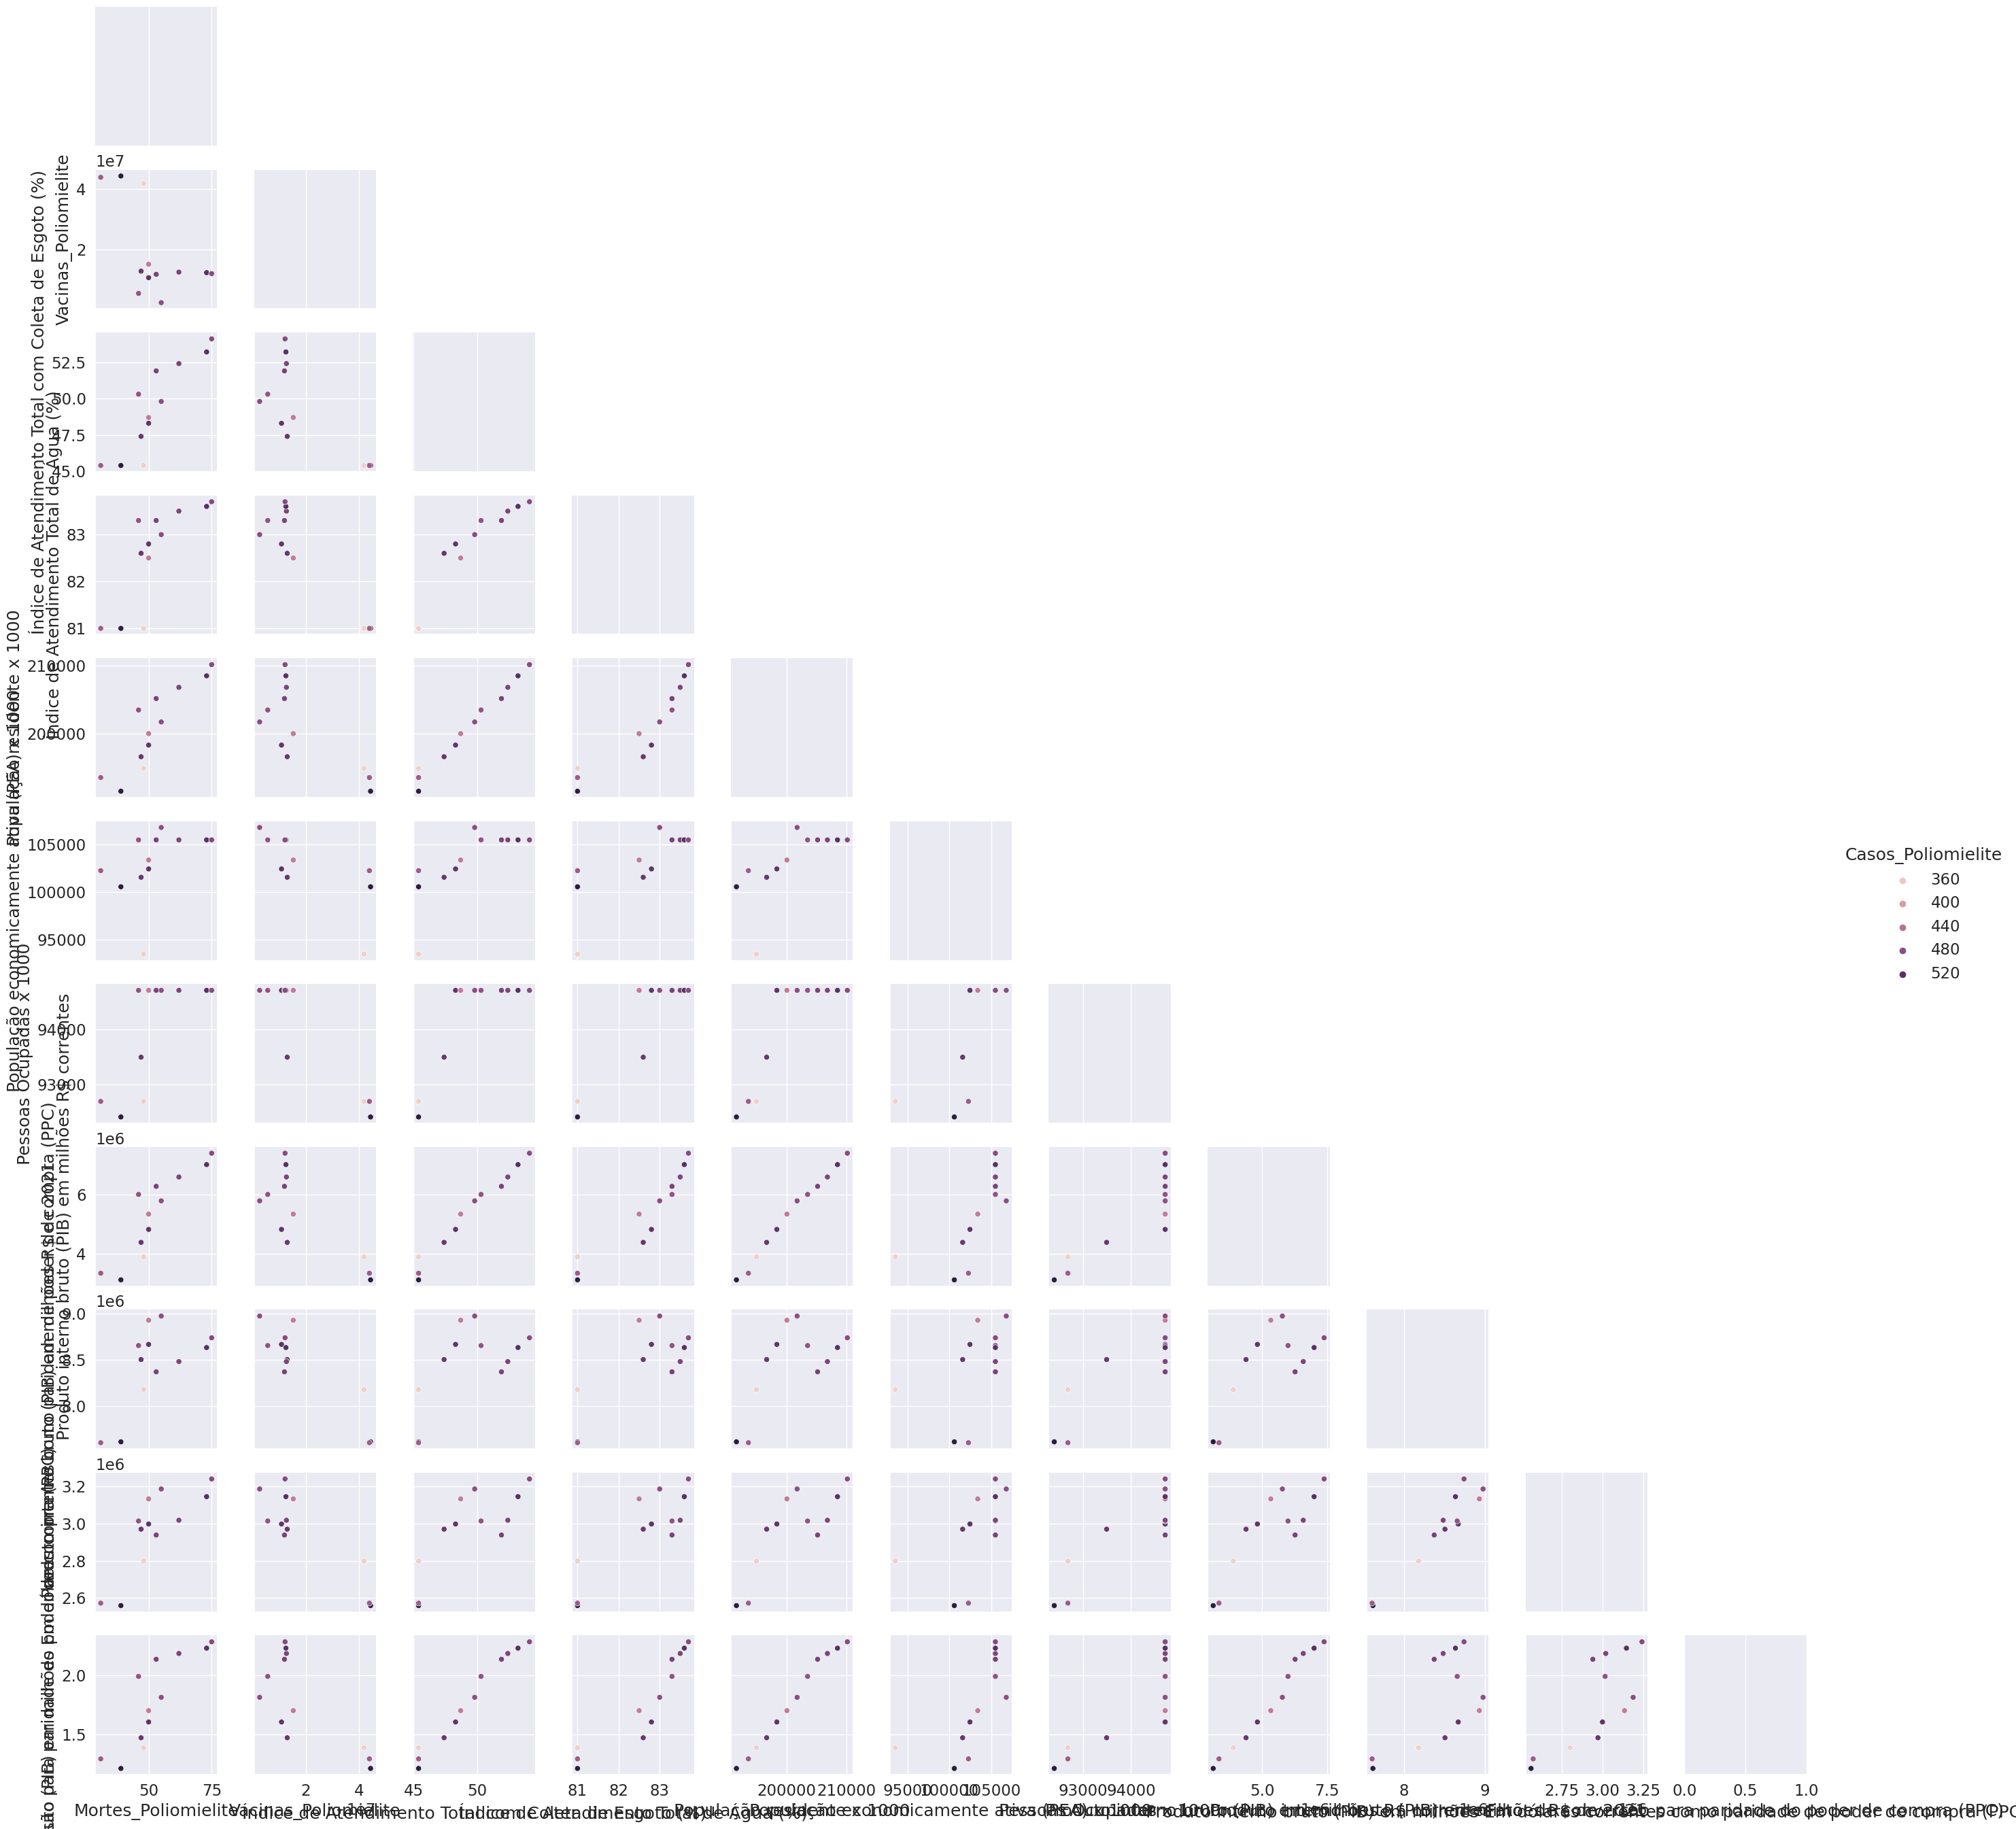

In [63]:
sns.pairplot(df_combined2, hue='Casos_Poliomielite', corner=True)

In [64]:
cca = CCA(n_components=2)

cca.fit(X, Y)

CCA()

In [65]:
cca.x_loadings_

array([[ 0.73305923,  0.68631626],
       [-0.68021651,  0.72730323]])

In [66]:
cca.y_loadings_

array([[  4.24255479,  -2.00055765],
       [ -8.11809544,   2.78350394],
       [ -5.99503611,   2.66941748],
       [ -9.91209466,   2.52083437],
       [  1.99928248,   2.3759117 ],
       [ -6.60643377,   2.04195291],
       [-10.02115757,   2.50157413],
       [ -9.74988996,   1.3523076 ],
       [-11.01789791,   1.96051758]])

In [67]:
cca.x_rotations_

array([[ 0.72730323,  0.68021651],
       [-0.68631626,  0.73305923]])

In [68]:
cca.y_rotations_

array([[ 0.05889279,  0.41543712],
       [-0.24395385, -1.18033036],
       [ 0.21114908,  1.2343916 ],
       [-0.5913719 , -4.27400121],
       [ 0.01710999, -0.12941243],
       [ 0.07864201,  0.59086634],
       [ 0.62406233,  4.43759936],
       [-0.32424972, -2.63711865],
       [ 0.20406987,  2.12273834]])

In [69]:
X.shape

(12, 2)

In [70]:
Y.shape

(12, 9)

In [71]:
X_c, Y_c = cca.transform(X, Y)

X_c.shape

(12, 2)

In [72]:
df_combined2[['U1', 'U2']] = X_c
df_combined2[['V1', 'V2']] = Y_c

In [73]:
df_combined2

,Casos_Poliomielite,Mortes_Poliomielite,Vacinas_Poliomielite,Índice de Atendimento Total com Coleta de Esgoto (%),Índice de Atendimento Total de Água (%),População residente x 1000,População economicamente ativa (PEA) x 1000,Pessoas Ocupadas x 1000,Produto interno bruto (PIB) em milhões R$ correntes,Produto interno bruto (PIB) em milhões R$ de 2021,Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC),Fator de conversão para paridade do poder de compra (PPC),U1,U2,V1,V2
Ano,,,,,,,,,,,,,,,,
2008-01-01,552,39,44402949,45.4,81.0,191532.0,100586.0,92402.0,3109803.1,7617493.9,2558895.4,1.215291,1.757427,0.190596,0.102000,0.043660
2009-01-01,464,31,43964558,45.4,81.0,193544.0,102281.0,92686.0,3333039.4,7607910.2,2572056.7,1.295865,0.921083,-1.458018,0.052770,-0.390028
2010-01-01,353,48,41910819,45.4,81.0,194891.0,93500.0,92686.0,3885847.0,8180650.8,2798924.7,1.388336,-1.598387,-1.973239,-0.091840,-0.563299
2011-01-01,508,47,12893826,47.4,82.6,196604.0,101586.0,93493.0,4376382.0,8505784.5,2970630.8,1.473216,0.690534,0.059192,0.038577,0.042740
2012-01-01,514,50,10732877,48.3,82.8,198315.0,102463.0,94713.0,4814760.0,8669195.6,2998534.4,1.605704,0.614865,0.313328,0.036731,0.062484
2013-01-01,430,50,15181373,48.7,82.5,200004.0,103401.0,94713.0,5331619.0,8929689.5,3133893.6,1.701276,-0.596285,-0.819411,-0.035996,-0.174431
2014-01-01,479,55,2470536,49.8,83.0,201718.0,106824.0,94713.0,5778953.0,8974691.2,3187155.1,1.813201,-0.160081,0.130063,-0.007944,-0.032753
2015-01-01,475,46,5528193,50.3,83.3,203476.0,105519.0,94713.0,5995787.0,8656469.9,3014754.8,1.988814,0.268785,-0.443554,0.015724,-0.068926
2016-01-01,494,53,11845093,51.9,83.3,205157.0,105519.0,94713.0,6269328.0,8372891.1,2939094.2,2.133082,0.164316,0.216854,0.007160,0.116004


In [74]:
np.corrcoef(df_combined2['U1'],df_combined2['V1'])

array([[1.        , 0.99951184],
       [0.99951184, 1.        ]])

In [75]:
np.corrcoef(df_combined2['U2'],df_combined2['V2'])

array([[1.        , 0.97796611],
       [0.97796611, 1.        ]])

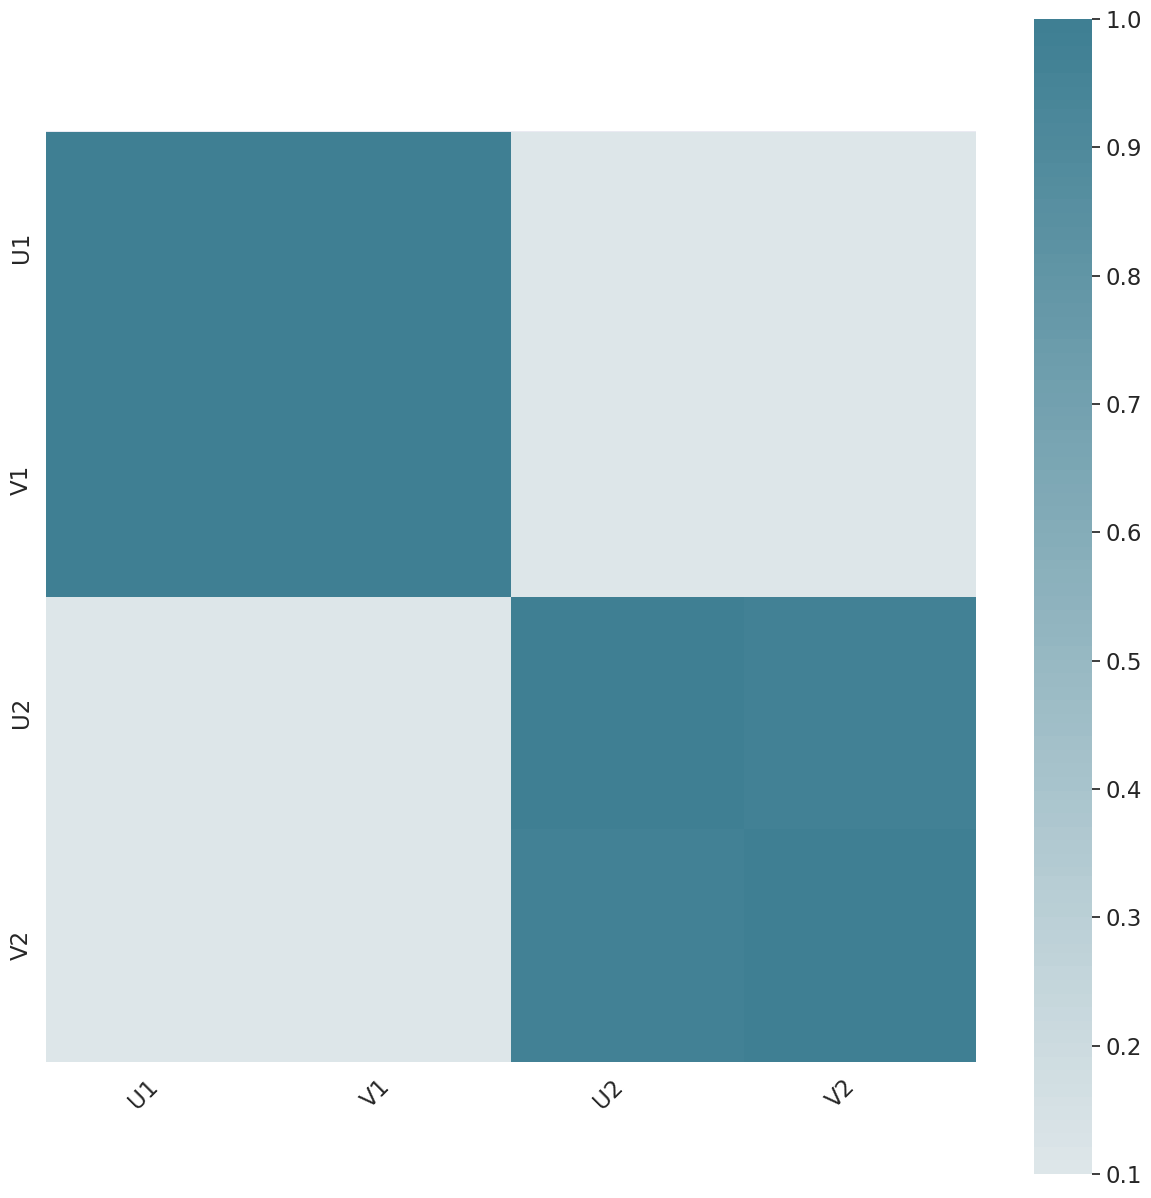

In [76]:
corr = df_combined2[['U1', 'V1', 'U2', 'V2']].corr()
ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    corr,
    vmin=.1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [77]:
corr = df_combined2[['U1', 'V1', 'U2', 'V2']].corr()
corr

,U1,V1,U2,V2
U1,1.000000e+00,9.995118e-01,4.069856e-17,1.620839e-15
V1,9.995118e-01,1.000000e+00,1.055143e-03,-2.575372e-15
U2,4.069856e-17,1.055143e-03,1.000000e+00,9.779661e-01
V2,1.620839e-15,-2.575372e-15,9.779661e-01,1.000000e+00


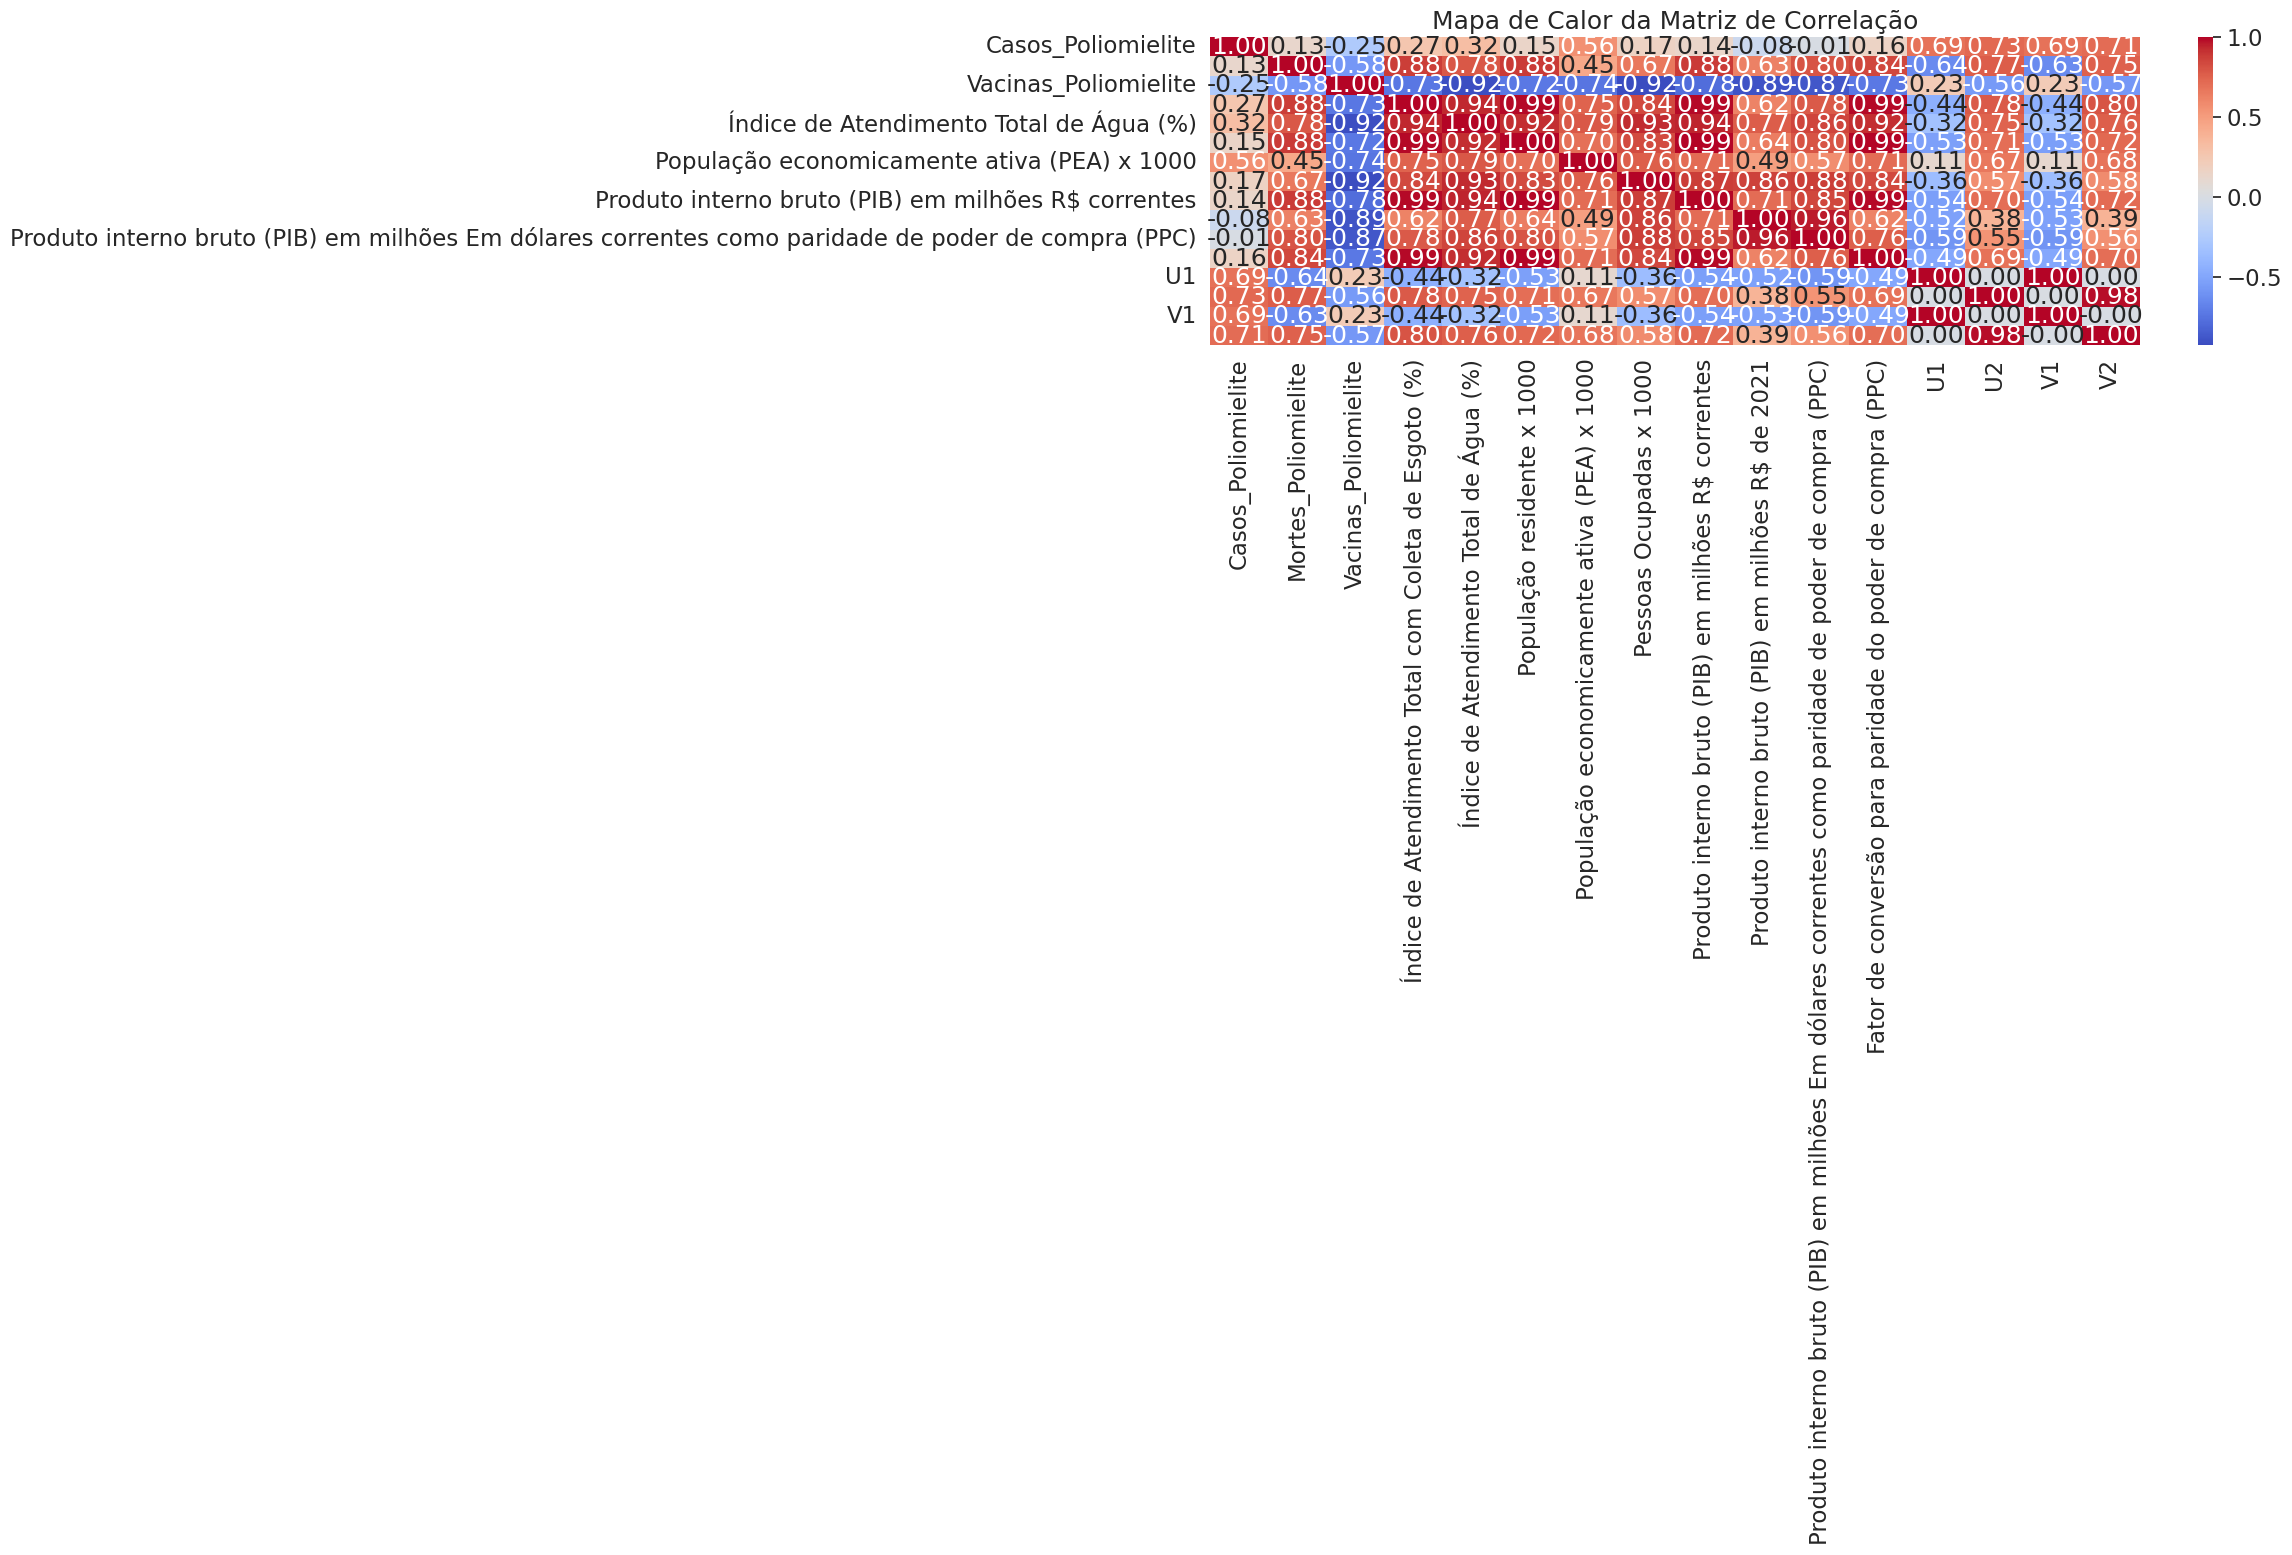

Coeficiente de Determinação (R²): 1.0
Erro Quadrático Médio (MSE): 1.8118799845318646e-20


In [78]:
correlation_matrix = df_combined2.corr()
plt.figure(figsize=(15, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

X = df_combined2[['Vacinas_Poliomielite', 'Índice de Atendimento Total com Coleta de Esgoto (%)',
                  'Índice de Atendimento Total de Água (%)', 'População residente x 1000',
                  'População economicamente ativa (PEA) x 1000', 'Pessoas Ocupadas x 1000',
                  'Produto interno bruto (PIB) em milhões R$ correntes',
                  'Produto interno bruto (PIB) em milhões R$ de 2021',
                  'Produto interno bruto (PIB) em milhões Em dólares correntes como paridade de poder de compra (PPC)',
                  'Fator de conversão para paridade do poder de compra (PPC)','U1', 'V1', 'U2', 'V2']]

y = df_combined2[['Casos_Poliomielite', 'Mortes_Poliomielite']]
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Coeficiente de Determinação (R²): {r2}")
print(f"Erro Quadrático Médio (MSE): {mse}")


# Treinamento e Previsões pela corerlação canonica

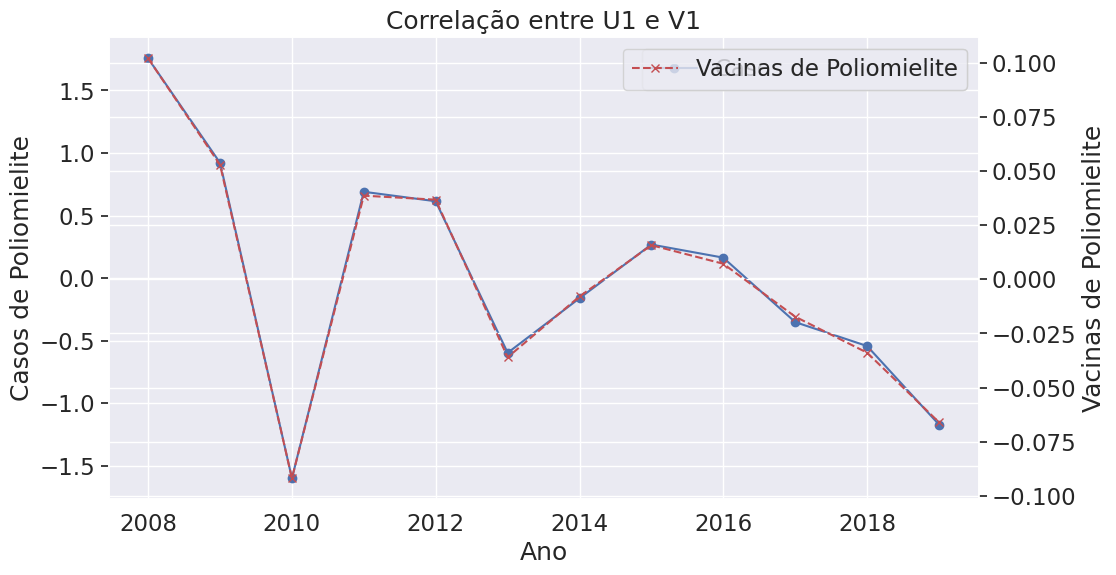

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined2.index, df_combined2['U1'], marker='o', linestyle='-', color='b', label='Casos de Poliomielite')
plt.title('Correlação entre U1 e V1')
plt.xlabel('Ano')
plt.ylabel('Casos de Poliomielite')
plt.legend()

ax2 = plt.gca().twinx()
ax2.plot(df_combined2.index, df_combined2['V1'], marker='x', linestyle='--', color='r', label='Vacinas de Poliomielite')
ax2.set_ylabel('Vacinas de Poliomielite')
ax2.legend(loc='upper right')

plt.subplots_adjust(right=0.85)
plt.grid(True)
plt.show()


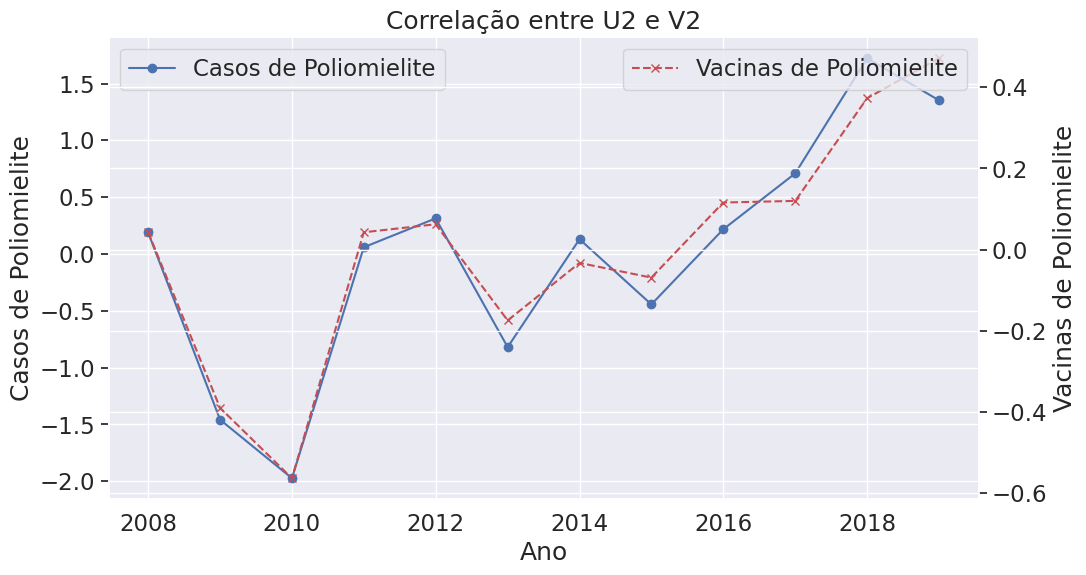

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined2.index, df_combined2['U2'], marker='o', linestyle='-', color='b', label='Casos de Poliomielite')
plt.title('Correlação entre U2 e V2')
plt.xlabel('Ano')
plt.ylabel('Casos de Poliomielite')
plt.legend()

ax2 = plt.gca().twinx()
ax2.plot(df_combined2.index, df_combined2['V2'], marker='x', linestyle='--', color='r', label='Vacinas de Poliomielite')
ax2.set_ylabel('Vacinas de Poliomielite')
ax2.legend(loc='upper right')

plt.subplots_adjust(right=0.85)
plt.grid(True)
plt.show()


In [81]:
correlacao_canonica = df_combined2[['U1', 'V1','U2', 'V2']]

In [82]:
correlacao_canonica

,U1,V1,U2,V2
Ano,,,,
2008-01-01,1.757427,0.102000,0.190596,0.043660
2009-01-01,0.921083,0.052770,-1.458018,-0.390028
2010-01-01,-1.598387,-0.091840,-1.973239,-0.563299
2011-01-01,0.690534,0.038577,0.059192,0.042740
2012-01-01,0.614865,0.036731,0.313328,0.062484
2013-01-01,-0.596285,-0.035996,-0.819411,-0.174431
2014-01-01,-0.160081,-0.007944,0.130063,-0.032753
2015-01-01,0.268785,0.015724,-0.443554,-0.068926
2016-01-01,0.164316,0.007160,0.216854,0.116004


In [83]:
correlacao_canonica.corr()

,U1,V1,U2,V2
U1,1.000000e+00,9.995118e-01,4.069856e-17,1.620839e-15
V1,9.995118e-01,1.000000e+00,1.055143e-03,-2.575372e-15
U2,4.069856e-17,1.055143e-03,1.000000e+00,9.779661e-01
V2,1.620839e-15,-2.575372e-15,9.779661e-01,1.000000e+00


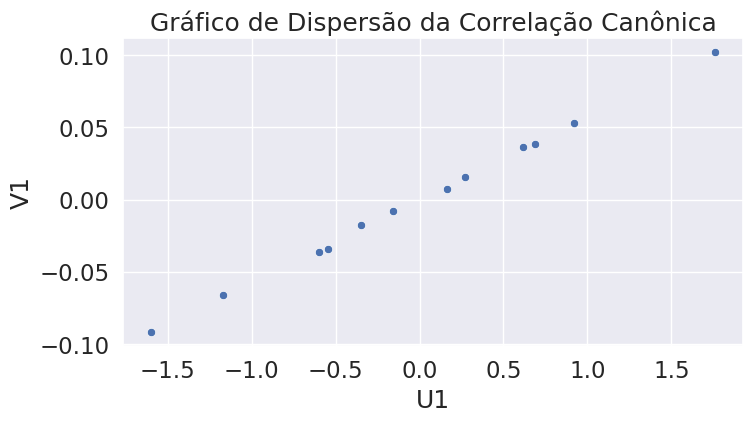

In [84]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=correlacao_canonica, x='U1', y='V1')
plt.xlabel('U1')
plt.ylabel('V1')
plt.title('Gráfico de Dispersão da Correlação Canônica')
plt.show()

In [85]:
X = correlacao_canonica

y = df_combined2[['Casos_Poliomielite']]
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     Casos_Poliomielite   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.175e+29
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          5.74e-101
Time:                        22:54:30   Log-Likelihood:                 334.71
No. Observations:                  12   AIC:                            -659.4
Df Residuals:                       7   BIC:                            -657.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        480.4167   7.04e-14   6.82e+15      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



In [86]:
# Adicione uma coluna de constante (intercepto)
dados = sm.add_constant(correlacao_canonica)

# Faça as previsões com base no modelo existente
previsoes = modelo.predict(dados)

# As previsões estão na variável "previsoes"
print(previsoes)

Ano
2008-01-01    552.0
2009-01-01    464.0
2010-01-01    353.0
2011-01-01    508.0
2012-01-01    514.0
2013-01-01    430.0
2014-01-01    479.0
2015-01-01    475.0
2016-01-01    494.0
2017-01-01    492.0
2018-01-01    520.0
2019-01-01    484.0
dtype: float64


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [88]:
# Divida os dados em conjuntos de treinamento e teste
X = correlacao_canonica[['U1']]
y = correlacao_canonica['V1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Crie e ajuste o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [90]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


MSE: 6.061982635851683e-06
MAE: 0.0023728132451896304


In [91]:
novos_valores_U1 = np.array([0.5, 1.0, 1.5]).reshape(-1, 1)
previsoes = model.predict(novos_valores_U1)

print('Previsões para novos valores de U1:')
for i, valor_U1 in enumerate(novos_valores_U1):
    print(f'U1: {valor_U1[0]}, Previsão de V1: {previsoes[i]}')

Previsões para novos valores de U1:
U1: 0.5, Previsão de V1: 0.028502327812018967
U1: 1.0, Previsão de V1: 0.05714844059189858
U1: 1.5, Previsão de V1: 0.0857945533717782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

melhores_hiperparametros = grid_search.best_params_
print('Melhores Hiperparâmetros:', melhores_hiperparametros)

modelo_ajustado = LinearRegression(**melhores_hiperparametros)
modelo_ajustado.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Melhores Hiperparâmetros: {'fit_intercept': True}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan]



LinearRegression()

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_ajustado, X_train, y_train, cv=5)
print('Pontuações da Validação Cruzada:', scores)
print('Média das Pontuações da Validção Cruzada:', np.mean(scores))


Pontuações da Validação Cruzada: [0.9869939  0.99998448 0.99875766 0.9956994         nan]
Média das Pontuações da Validção Cruzada: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [94]:
novos_valores_U1 = np.array([2.0, 2.5, 3.0]).reshape(-1, 1)
previsoes_continuacao = modelo_ajustado.predict(novos_valores_U1)

print('Previsões para novos valores de U1 (continuação):')
for i, valor_U1 in enumerate(novos_valores_U1):
    print(f'U1: {valor_U1[0]}, Previsão de V1: {previsoes_continuacao[i]}')


Previsões para novos valores de U1 (continuação):
U1: 2.0, Previsão de V1: 0.11444066615165782
U1: 2.5, Previsão de V1: 0.14308677893153743
U1: 3.0, Previsão de V1: 0.17173289171141704


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



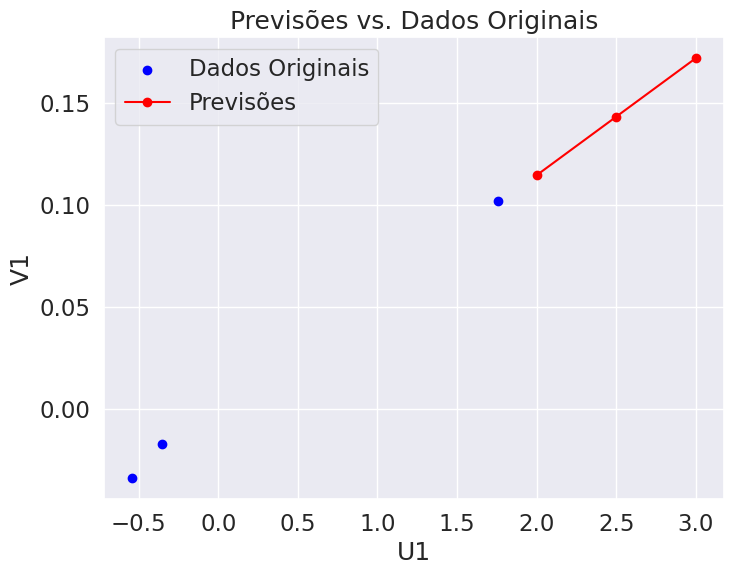

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(X_test, y_test, label='Dados Originais', color='blue')

plt.plot(novos_valores_U1, previsoes_continuacao, label='Previsões', color='red', marker='o')
plt.xlabel('U1')
plt.ylabel('V1')
plt.title('Previsões vs. Dados Originais')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


In [96]:
from pycaret.time_series import *

In [97]:
from pycaret.time_series import TSForecastingExperiment

In [98]:
s = setup(df_combined2['Vacinas_Poliomielite'], fh = 2, seasonal_period='Y', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Vacinas_Poliomielite
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(12, 1)"
5,Transformed data shape,"(12, 1)"
6,Transformed train set shape,"(10, 1)"
7,Transformed test set shape,"(2, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [99]:
exp = TSForecastingExperiment()
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [131]:
exp.setup(df_combined2['Vacinas_Poliomielite'], fh = 2, seasonal_period='Y', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Vacinas_Poliomielite
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(12, 1)"
5,Transformed data shape,"(12, 1)"
6,Transformed train set shape,"(10, 1)"
7,Transformed test set shape,"(2, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [101]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,12.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,18831937.833333
3,Summary,Statistics,Transformed,Median,,12490340.0
4,Summary,Statistics,Transformed,Standard Deviation,,15231499.092573
5,Summary,Statistics,Transformed,Variance,,231998564607065.03125
6,Summary,Statistics,Transformed,Kurtosis,,-0.442124
7,Summary,Statistics,Transformed,Skewness,,1.117672
8,Summary,Statistics,Transformed,# Distinct Values,,12.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 1}",6.470106


In [102]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.8490,0.5122,6697207.8333,6735566.3030,1.3895,0.7041,-127.5640,1.6067
theta,Theta Forecaster,1.1869,0.7657,10195428.2119,10610374.1614,1.0979,1.4203,-580.6685,0.0900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.2568,0.8112,9952003.1541,10318950.7852,1.0058,1.2572,-1312.4933,0.2333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.4190,0.9272,11529180.7198,12124843.2847,1.1659,1.2641,-1258.4380,0.2767
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.5216,1.0243,12320334.6552,13458225.8568,1.2384,1.3294,-1387.8442,0.2933
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.5237,1.0247,12341498.0626,13464593.8462,1.2407,1.3313,-1387.9442,0.1033
polytrend,Polynomial Trend Forecaster,1.5585,1.0650,12602159.8361,14074155.8726,1.3005,1.4560,-1409.4080,0.0300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.7480,1.1238,14571876.0195,15155106.2688,1.7287,1.5915,-1481.7426,0.1200
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.7532,1.1336,14606293.1601,15236045.8869,1.5142,1.7734,-1430.1245,0.1067
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.7532,1.1336,14606293.1601,15236045.8869,1.5142,1.7734,-1430.1245,0.1433


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [148]:
naive = create_model('naive')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2011,0.2118,0.1325,2224248.0000,2225148.5184,0.1760,0.1729,-0.0008
1,2013,1.4667,0.8552,11182008.5000,11286036.9783,3.4456,1.1862,-53.4961
2,2015,0.8684,0.5488,6685367.0000,6695513.4123,0.5470,0.7531,-329.1951
Mean,NaT,0.8490,0.5122,6697207.8333,6735566.3030,1.3895,0.7041,-127.5640
SD,NaT,0.5125,0.2962,3656999.9952,3699200.6431,1.4617,0.4151,144.2377


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [149]:
plot_model(naive, plot='train_test_split')

In [150]:
final = finalize_model(naive)

In [151]:
final

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster())]))])

In [152]:
plot_model(final, data_kwargs={'fh':4})

# Conclusões

<H3>Com base nos resultados obtidos neste estudo, podemos chegar a várias conclusões importantes:

Primeiramente, a aplicação de técnicas de aprendizado de máquina, em particular a Regressão Linear, demonstrou ser eficaz na previsão da incidência de casos de poliomielite no Brasil. O modelo desenvolvido apresentou um desempenho satisfatório, o que sugere que as variáveis ​​utilizadas, incluindo dados de casos e vacinação, saneamento básico e indicadores socioeconômicos, desempenham um papel significativo na dinâmica da poliomielite.

Além disso, o estudo destacou a importância da vacinação na redução da incidência da poliomielite. As campanhas de vacinação desempenharam um papel crucial na prevenção da doença, e a análise mostrou uma correlação positiva entre a cobertura vacinal e a diminuição dos casos.

Também observamos a influência dos fatores socioeconômicos e do acesso ao saneamento básico na disseminação da poliomielite. Compreender essas relações é fundamental para o desenvolvimento de estratégias de controle e prevenção eficazes.
